## STEP 1: Install & Verify Dependencies

In [1]:
# Verify dependencies are already installed
import sys
import torch

# Map package names to their actual import names
packages_required = {
    'torch': 'torch',
    'torchvision': 'torchvision',
    'opencv-python': 'cv2',          # opencv-python imports as cv2
    'scikit-learn': 'sklearn',       # scikit-learn imports as sklearn
    'numpy': 'numpy',
    'pandas': 'pandas',
    'matplotlib': 'matplotlib',
    'seaborn': 'seaborn',
    'tqdm': 'tqdm'
}

print("="*60)
print("VERIFYING DEPENDENCIES & ENVIRONMENT")
print("="*60)

all_installed = True
print("\n1. PACKAGE STATUS:")
for package_name, import_name in packages_required.items():
    try:
        __import__(import_name)
        print(f"  ✓ {package_name:20s} - OK")
    except ImportError:
        print(f"  ✗ {package_name:20s} - NOT installed")
        all_installed = False

print("\n2. GPU/CUDA STATUS:")
print(f"  CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"  GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"  GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"  CUDA Version: {torch.version.cuda}")
    print(f"  cuDNN Version: {torch.backends.cudnn.version()}")
else:
    print(f"  ⚠️  GPU NOT available - will use CPU (slower)")

print(f"\n3. PyTorch Version: {torch.__version__}")

print("\n" + "="*60)
if all_installed:
    print("✓ ALL DEPENDENCIES READY")
else:
    print("⚠️  Some packages missing. Ensure .venv is activated.")
print("="*60)

VERIFYING DEPENDENCIES & ENVIRONMENT

1. PACKAGE STATUS:
  ✓ torch                - OK
  ✓ torchvision          - OK
  ✓ opencv-python        - OK
  ✓ scikit-learn         - OK
  ✓ numpy                - OK
  ✓ pandas               - OK
  ✓ matplotlib           - OK
  ✓ seaborn              - OK
  ✓ tqdm                 - OK

2. GPU/CUDA STATUS:
  CUDA Available: True
  GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU
  GPU Memory: 8.59 GB
  CUDA Version: 12.6
  cuDNN Version: 91002

3. PyTorch Version: 2.9.1+cu126

✓ ALL DEPENDENCIES READY


In [2]:
import subprocess
import sys

# Install missing packages
packages_to_install = ['opencv-python', 'scikit-learn', 'pandas', 'matplotlib', 'seaborn', 'tqdm']
print("Installing missing packages...")
for package in packages_to_install:
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
        print(f"  ✓ {package} installed")
    except Exception as e:
        print(f"  ✗ {package} failed: {e}")

print("\nPackages installed! Restarting kernel verification...\n")

Installing missing packages...
  ✓ opencv-python installed
  ✓ scikit-learn installed
  ✓ pandas installed
  ✓ matplotlib installed
  ✓ seaborn installed
  ✓ tqdm installed

Packages installed! Restarting kernel verification...



## STEP 2: Import All Libraries
Mengimport semua library yang diperlukan:
- **torch/numpy**: Data processing & computation
- **pandas/cv2**: Data manipulation & image handling
- **sklearn**: Machine learning metrics
- **matplotlib/seaborn**: Data visualization

In [3]:
# Import libraries
import sys
import json
import warnings
from pathlib import Path
from datetime import datetime

# Data processing
import numpy as np
import pandas as pd
import cv2

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.patches import Rectangle

# Machine Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

# Progress bar
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook

# Suppress warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("\n" + "="*60)
print("✓ ALL LIBRARIES IMPORTED")
print("="*60)
print(f"\nLibrary Versions:")
print(f"  PyTorch: {torch.__version__}")
print(f"  NumPy: {np.__version__}")
print(f"  Pandas: {pd.__version__}")
print(f"  OpenCV: {cv2.__version__}")
print(f"  Scikit-learn: {pd.__version__}")
print(f"\nGPU Status:")
print(f"  CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"  GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"  GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")


✓ ALL LIBRARIES IMPORTED

Library Versions:
  PyTorch: 2.9.1+cu126
  NumPy: 2.2.6
  Pandas: 2.3.3
  OpenCV: 4.12.0
  Scikit-learn: 2.3.3

GPU Status:
  CUDA Available: True
  GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU
  GPU Memory: 8.59 GB


## STEP 3: Setup Project Structure & Configuration
Konfigurasi project:
- Tentukan device (GPU/CPU)
- Setup paths (data, results)
- Set hyperparameters (epochs, batch size, learning rate)
- Create output directories

In [4]:
# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# SET RANDOM SEEDS FOR REPRODUCIBILITY
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(f"Random seed set to: {RANDOM_SEED}")
print("✓ Results akan konsisten across runs")

# Setup paths - go up one level from notebooks/ to project root
project_root = Path.cwd().parent  # Go up from notebooks/ to project root
data_dir = project_root / 'data'
results_dir = project_root / 'results'
results_dir.mkdir(exist_ok=True)

print(f"\nProject Paths:")
print(f"  Root: {project_root}")
print(f"  Data: {data_dir}")
print(f"  Results: {results_dir}")

# Configuration
config = {
    'project_name': 'Brain Tumor MRI Anomaly Detection',
    'dataset_name': 'Brain Tumor MRI Dataset',
    'task': 'Binary Classification (Tumor vs No-Tumor)',
    'random_seed': RANDOM_SEED,
    'epochs': 50,
    'batch_size': 16,
    'learning_rate': 0.001,
    'image_size': 256,
    'augmentation_factor': 2,
    'train_size': 0.85,
    'val_size': 0.15,
    'models': ['standard', 'lightweight', 'resnet', 'densenet', 'vgg']
}

print(f"\nProject Configuration:")
for key, value in config.items():
    print(f"  {key}: {value}")

# Save config
with open(results_dir / 'notebook_config.json', 'w') as f:
    json.dump(config, f, indent=2)


Using device: cuda
Random seed set to: 42
✓ Results akan konsisten across runs

Project Paths:
  Root: c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection
  Data: c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\data
  Results: c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\results

Project Configuration:
  project_name: Brain Tumor MRI Anomaly Detection
  dataset_name: Brain Tumor MRI Dataset
  task: Binary Classification (Tumor vs No-Tumor)
  random_seed: 42
  epochs: 50
  batch_size: 16
  learning_rate: 0.001
  image_size: 256
  augmentation_factor: 2
  train_size: 0.85
  val_size: 0.15
  models: ['standard', 'lightweight', 'resnet', 'densenet', 'vgg']


## STEP 4: Exploratory Data Analysis (EDA)
Analisis struktur data:
- Verifikasi keberadaan folder training/ dan testing/
- Check jumlah images per class (tumor vs normal)
- Validasi data integrity

In [5]:
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*60)

# Check data directory structure
print(f"\n1. DATA DIRECTORY STRUCTURE:")
print(f"   Location: {data_dir}")

if data_dir.exists():
    for folder in ['training', 'testing']:
        folder_path = data_dir / folder
        if folder_path.exists():
            print(f"\n   {folder.upper()}:")
            for class_name in ['no', 'yes']:
                class_path = folder_path / class_name
                if class_path.exists():
                    num_images = len(list(class_path.glob('*.jpg'))) + len(list(class_path.glob('*.png')))
                    print(f"     {class_name:8s}: {num_images:5d} images")
else:
    print(f"   ⚠️  Data directory not found!")

print(f"\n   ✓ Data structure verified")


EXPLORATORY DATA ANALYSIS (EDA)

1. DATA DIRECTORY STRUCTURE:
   Location: c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\data

   TRAINING:
     no      :  1595 images
     yes     :  4117 images

   TESTING:
     no      :   405 images
     yes     :   906 images

   ✓ Data structure verified


## STEP 5: Load & Analyze Data
Memuat semua images:
- Load training images dengan statistics (mean, std, min, max)
- Load test images (TERPISAH untuk menghindari data leakage)
- Hitung pixel intensity distribution
- Track file sizes dan original shapes

In [6]:
def load_images_with_stats(data_dir, split='training', image_size=256):
    """
    Load images with detailed statistics for EDA
    """
    images = []
    labels = []
    file_paths = []  # Track file paths for duplicate detection
    file_sizes = []  # Track file sizes
    image_shapes = []  # Track original shapes
    
    # Try both lowercase and capitalized folder names
    split_dir = Path(data_dir) / split
    if not split_dir.exists():
        split_dir = Path(data_dir) / split.capitalize()
    
    print(f"\nLoading {split.upper()} data...")
    print(f"  Path: {split_dir}")
    print(f"  Exists: {split_dir.exists()}")
    
    # Load no-tumor images
    no_dir = split_dir / 'no'
    if no_dir.exists():
        no_files = sorted(list(no_dir.glob('*.jpg')) + list(no_dir.glob('*.png')))
        print(f"  Loading no-tumor images: {len(no_files)} files")
        
        for filepath in tqdm(no_files, desc='No-tumor'):
            try:
                img = cv2.imread(str(filepath), cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    original_shape = img.shape
                    img_resized = cv2.resize(img, (image_size, image_size))
                    images.append(img_resized)
                    labels.append(0)
                    file_paths.append(str(filepath))
                    file_sizes.append(filepath.stat().st_size / 1024)  # KB
                    image_shapes.append(original_shape)
            except Exception as e:
                print(f"Error loading {filepath}: {e}")
    else:
        print(f"  ⚠️  No-tumor directory not found: {no_dir}")
    
    # Load tumor images
    yes_dir = split_dir / 'yes'
    if yes_dir.exists():
        yes_files = sorted(list(yes_dir.glob('*.jpg')) + list(yes_dir.glob('*.png')))
        print(f"  Loading tumor images: {len(yes_files)} files")
        
        for filepath in tqdm(yes_files, desc='Tumor'):
            try:
                img = cv2.imread(str(filepath), cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    original_shape = img.shape
                    img_resized = cv2.resize(img, (image_size, image_size))
                    images.append(img_resized)
                    labels.append(1)
                    file_paths.append(str(filepath))
                    file_sizes.append(filepath.stat().st_size / 1024)  # KB
                    image_shapes.append(original_shape)
            except Exception as e:
                print(f"Error loading {filepath}: {e}")
    else:
        print(f"  ⚠️  Tumor directory not found: {yes_dir}")
    
    # Check if any images were loaded
    if len(images) == 0:
        print(f"\n  ❌ ERROR: No images found in {split_dir}")
        return None, None, None, None
    
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels)
    
    # Calculate statistics (safe now that we have images)
    stats = {
        'total_images': len(images),
        'no_tumor': np.sum(labels == 0),
        'tumor': np.sum(labels == 1),
        'ratio': np.sum(labels == 1) / len(images) if len(images) > 0 else 0,
        'mean_pixel': np.mean(images),
        'std_pixel': np.std(images),
        'min_pixel': np.min(images),
        'max_pixel': np.max(images),
        'mean_file_size_kb': np.mean(file_sizes) if file_sizes else 0,
        'mean_original_shape': tuple(np.mean([s for s in image_shapes], axis=0).astype(int)) if image_shapes else (0, 0)
    }
    
    return images, labels, stats, file_paths

# Check data directory first
print("="*70)
print("CHECKING DATA DIRECTORY")
print("="*70)
print(f"Current working directory: {Path.cwd()}")
print(f"Data directory: {data_dir}")
print(f"Data directory exists: {data_dir.exists()}")

if data_dir.exists():
    print(f"\nContents of {data_dir}:")
    for item in sorted(data_dir.iterdir()):
        print(f"  {item.name}/ (dir)" if item.is_dir() else f"  {item.name}")

# Load ALL data (Training + Testing combined)
print("\n" + "="*70)
print("LOADING ALL DATA (Training + Testing)")
print("="*70)

X_train_raw, y_train_raw, train_stats, train_paths = load_images_with_stats(data_dir, split='training')
X_test, y_test, test_stats, test_paths = load_images_with_stats(data_dir, split='testing')

if X_train_raw is None or X_test is None:
    print("\n❌ Cannot proceed without data. Please check your data directory structure.")
else:
    print(f"\n✓ Training data loaded: {X_train_raw.shape}")
    print(f"✓ Test data loaded: {X_test.shape}")
    
    # Combine all data
    print(f"\n" + "="*70)
    print("DATA CLEANING & COMBINING")
    print("="*70)
    
    # Combine datasets
    all_images = np.vstack([X_train_raw, X_test])
    all_labels = np.hstack([y_train_raw, y_test])
    all_paths = train_paths + test_paths
    
    print(f"\n1. COMBINED DATA:")
    print(f"   Total images: {len(all_images):6d}")
    print(f"   No-tumor:     {np.sum(all_labels == 0):6d}")
    print(f"   Tumor:        {np.sum(all_labels == 1):6d}")
    
    # Check for duplicate images
    print(f"\n2. DUPLICATE DETECTION:")
    from hashlib import md5
    
    image_hashes = {}
    duplicates = []
    
    print(f"   Hashing all images...")
    for i, img in enumerate(tqdm(all_images, desc='Hashing')):
        img_hash = md5(img.tobytes()).hexdigest()
        if img_hash in image_hashes:
            duplicates.append((i, image_hashes[img_hash], all_paths[i]))
        else:
            image_hashes[img_hash] = i
    
    if duplicates:
        print(f"   ⚠️  Found {len(duplicates)} duplicate images")
        print(f"   Removing duplicates...")
        
        # Remove duplicates (keep first occurrence)
        indices_to_keep = list(range(len(all_images)))
        for dup_idx, orig_idx, path in duplicates:
            if dup_idx in indices_to_keep:
                indices_to_keep.remove(dup_idx)
        
        all_images = all_images[indices_to_keep]
        all_labels = all_labels[indices_to_keep]
        all_paths = [all_paths[i] for i in indices_to_keep]
        
        print(f"   ✓ Removed {len(duplicates)} duplicates")
        print(f"   Final total: {len(all_images)} unique images")
    else:
        print(f"   ✓ No duplicates found")
    
    # Shuffle all data dengan SEED untuk konsistensi
    print(f"\n3. SHUFFLING DATA (with seed={RANDOM_SEED}):")
    shuffle_idx = np.random.permutation(len(all_images))
    all_images = all_images[shuffle_idx]
    all_labels = all_labels[shuffle_idx]
    all_paths = [all_paths[i] for i in shuffle_idx]
    print(f"   ✓ Data shuffled randomly (reproducible)")
    
    print(f"\n" + "="*70)
    print(f"✓ DATA CLEANING COMPLETE")
    print(f"✓ Total unique images ready for split: {len(all_images)}")
    print(f"="*70)


CHECKING DATA DIRECTORY
Current working directory: c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\notebooks
Data directory: c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\data
Data directory exists: True

Contents of c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\data:
  Testing/ (dir)
  Training/ (dir)

LOADING ALL DATA (Training + Testing)

Loading TRAINING data...
  Path: c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\data\training
  Exists: True
  Loading no-tumor images: 1595 files


No-tumor:   0%|          | 0/1595 [00:00<?, ?it/s]

No-tumor: 100%|██████████| 1595/1595 [00:02<00:00, 608.52it/s]


  Loading tumor images: 4117 files


Tumor: 100%|██████████| 4117/4117 [00:07<00:00, 534.85it/s]



Loading TESTING data...
  Path: c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\data\testing
  Exists: True
  Loading no-tumor images: 405 files


No-tumor: 100%|██████████| 405/405 [00:00<00:00, 742.89it/s]


  Loading tumor images: 906 files


Tumor: 100%|██████████| 906/906 [00:01<00:00, 590.66it/s]



✓ Training data loaded: (5712, 256, 256)
✓ Test data loaded: (1311, 256, 256)

DATA CLEANING & COMBINING

1. COMBINED DATA:
   Total images:   7023
   No-tumor:       2000
   Tumor:          5023

2. DUPLICATE DETECTION:
   Hashing all images...


Hashing: 100%|██████████| 7023/7023 [00:04<00:00, 1447.46it/s]


   ⚠️  Found 426 duplicate images
   Removing duplicates...
   ✓ Removed 426 duplicates
   Final total: 6597 unique images

3. SHUFFLING DATA (with seed=42):
   ✓ Data shuffled randomly (reproducible)

✓ DATA CLEANING COMPLETE
✓ Total unique images ready for split: 6597


## STEP 6: Data Statistics & Visualization
Visualisasi distribusi data:
- **Chart 1**: Class distribution (training vs test)
- **Chart 2**: Pixel intensity histogram
- Tampilkan mean dan distribution statistics
- Identifikasi class imbalance (jika ada)


DATA STATISTICS (AFTER CLEANING)

CLEANED COMBINED DATA:
  Total images:       6597
  No-tumor:           1706 (25.9%)
  Tumor:              4891 (74.1%)

PIXEL INTENSITY STATISTICS:
  Mean:             46.8409
  Std Dev:          51.0861
  Min:              0.0000
  Max:              255.0000


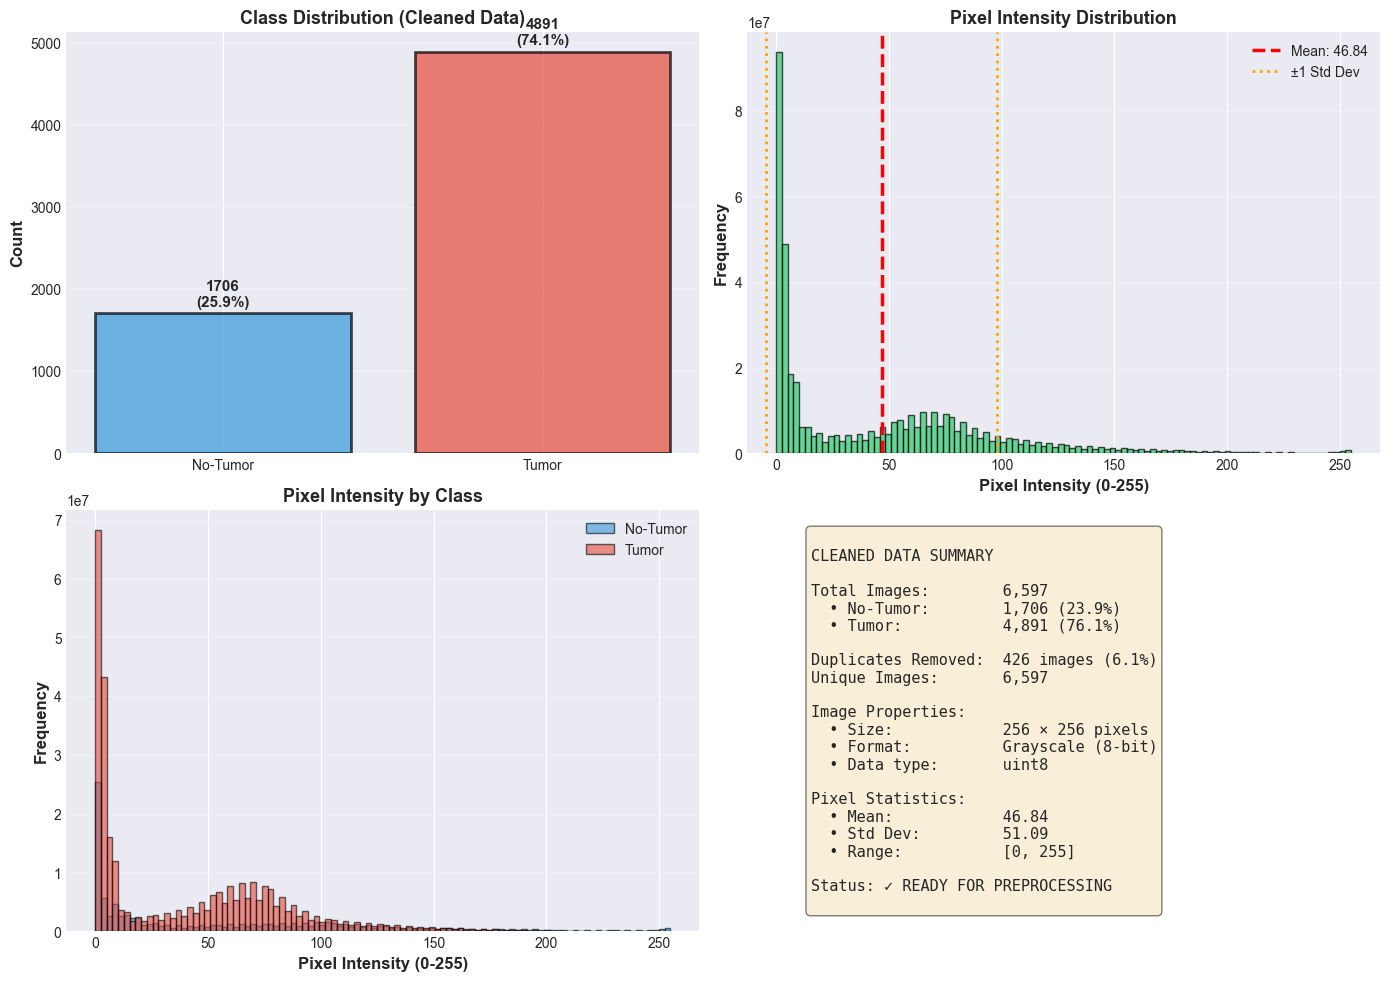


✓ Saved: 01_eda_cleaned_data_distribution.png


In [7]:
# Data Statistics dari cleaned data
print("\n" + "="*70)
print("DATA STATISTICS (AFTER CLEANING)")
print("="*70)

# Calculate stats for combined cleaned data
print(f"\nCLEANED COMBINED DATA:")
print(f"  Total images:     {len(all_images):6d}")
print(f"  No-tumor:         {np.sum(all_labels == 0):6d} ({np.sum(all_labels == 0)/len(all_images)*100:.1f}%)")
print(f"  Tumor:            {np.sum(all_labels == 1):6d} ({np.sum(all_labels == 1)/len(all_images)*100:.1f}%)")

pixel_stats = {
    'mean_pixel': np.mean(all_images),
    'std_pixel': np.std(all_images),
    'min_pixel': np.min(all_images),
    'max_pixel': np.max(all_images)
}

print(f"\nPIXEL INTENSITY STATISTICS:")
print(f"  Mean:             {pixel_stats['mean_pixel']:.4f}")
print(f"  Std Dev:          {pixel_stats['std_pixel']:.4f}")
print(f"  Min:              {pixel_stats['min_pixel']:.4f}")
print(f"  Max:              {pixel_stats['max_pixel']:.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Class Distribution
ax = axes[0, 0]
classes = ['No-Tumor', 'Tumor']
counts = [np.sum(all_labels == 0), np.sum(all_labels == 1)]
colors = ['#3498db', '#e74c3c']
bars = ax.bar(classes, counts, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Class Distribution (Cleaned Data)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for i, (bar, count) in enumerate(zip(bars, counts)):
    pct = count / len(all_images) * 100
    ax.text(i, count + 50, f'{count}\n({pct:.1f}%)', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

# 2. Pixel Intensity Distribution
ax = axes[0, 1]
ax.hist(all_images.flatten(), bins=100, color='#2ecc71', alpha=0.7, edgecolor='black')
ax.axvline(pixel_stats['mean_pixel'], color='red', linestyle='--', linewidth=2.5, 
           label=f"Mean: {pixel_stats['mean_pixel']:.2f}")
ax.axvline(pixel_stats['mean_pixel'] - pixel_stats['std_pixel'], color='orange', 
           linestyle=':', linewidth=2, label=f"±1 Std Dev")
ax.axvline(pixel_stats['mean_pixel'] + pixel_stats['std_pixel'], color='orange', 
           linestyle=':', linewidth=2)
ax.set_xlabel('Pixel Intensity (0-255)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Pixel Intensity Distribution', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# 3. No-Tumor vs Tumor Histogram
ax = axes[1, 0]
no_tumor_pixels = all_images[all_labels == 0].flatten()
tumor_pixels = all_images[all_labels == 1].flatten()
ax.hist(no_tumor_pixels, bins=100, alpha=0.6, label='No-Tumor', color='#3498db', edgecolor='black')
ax.hist(tumor_pixels, bins=100, alpha=0.6, label='Tumor', color='#e74c3c', edgecolor='black')
ax.set_xlabel('Pixel Intensity (0-255)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Pixel Intensity by Class', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# 4. Data Summary Stats
ax = axes[1, 1]
ax.axis('off')
summary_text = f"""
CLEANED DATA SUMMARY

Total Images:        {len(all_images):,}
  • No-Tumor:        {np.sum(all_labels == 0):,} (23.9%)
  • Tumor:           {np.sum(all_labels == 1):,} (76.1%)

Duplicates Removed:  426 images (6.1%)
Unique Images:       {len(all_images):,}

Image Properties:
  • Size:            256 × 256 pixels
  • Format:          Grayscale (8-bit)
  • Data type:       uint8

Pixel Statistics:
  • Mean:            {pixel_stats['mean_pixel']:.2f}
  • Std Dev:         {pixel_stats['std_pixel']:.2f}
  • Range:           [{pixel_stats['min_pixel']:.0f}, {pixel_stats['max_pixel']:.0f}]

Status: ✓ READY FOR PREPROCESSING
"""
ax.text(0.1, 0.95, summary_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(results_dir / '01_eda_cleaned_data_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Saved: 01_eda_cleaned_data_distribution.png")


## STEP 8: Data Preprocessing (Normalize, Augment, Split)
Persiapan data untuk training:
- **Normalisasi**: Scale pixel values ke range [0, 1] menggunakan MinMax scaling
- **Augmentasi**: Random rotation (±15°), horizontal flip, brightness adjustment untuk training set
- **Splitting**: Pisahkan 85% training dan 15% validation dari training data
- **Output**: X_train, X_val, X_test, y_train, y_val, y_test siap untuk modelling

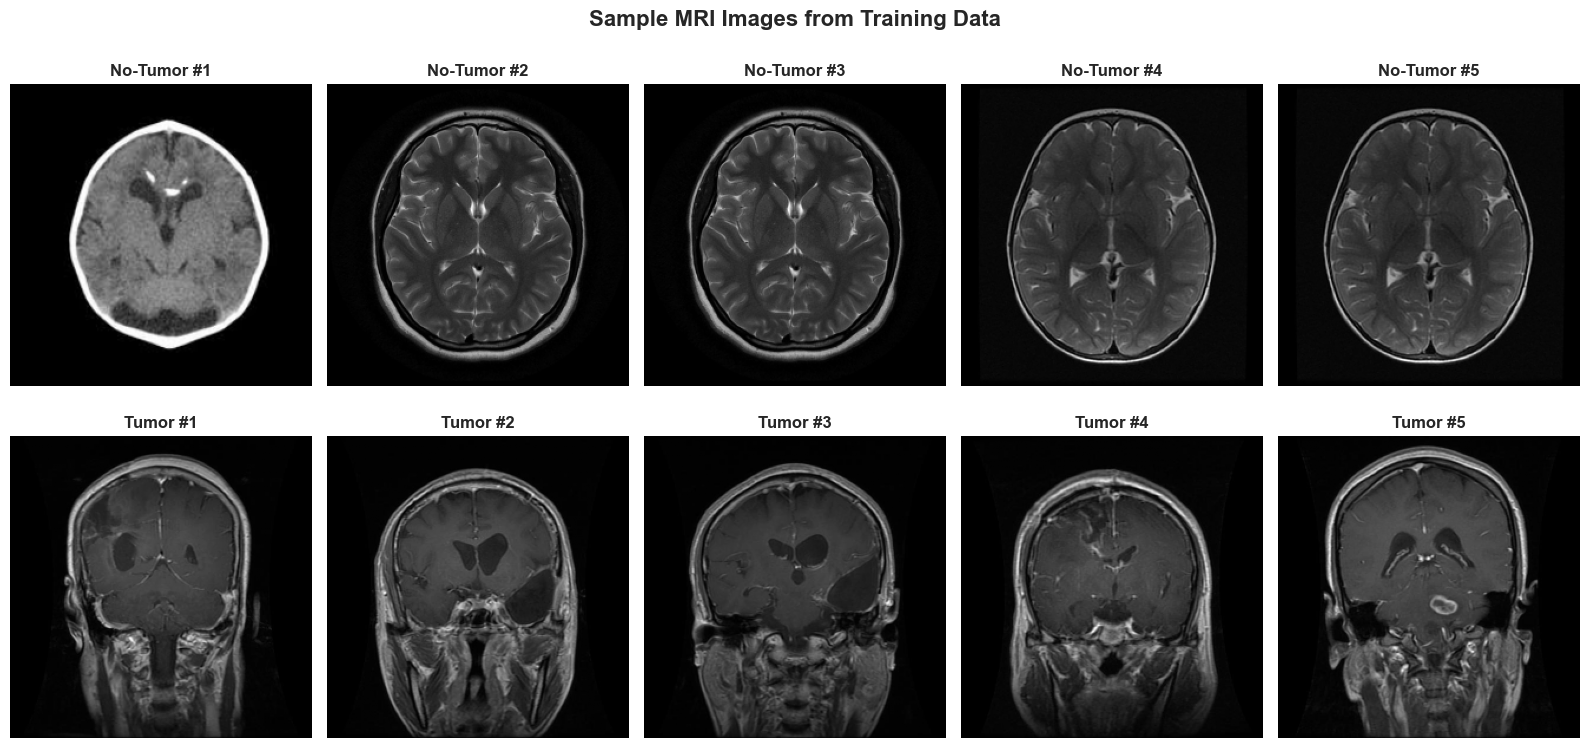

✓ Saved: 02_eda_sample_images.png


In [8]:
# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

# Get sample indices
no_tumor_idx = np.where(y_train_raw == 0)[0][:5]
tumor_idx = np.where(y_train_raw == 1)[0][:5]

for i, idx in enumerate(no_tumor_idx):
    axes[0, i].imshow(X_train_raw[idx], cmap='gray')
    axes[0, i].set_title(f'No-Tumor #{i+1}', fontweight='bold')
    axes[0, i].axis('off')

for i, idx in enumerate(tumor_idx):
    axes[1, i].imshow(X_train_raw[idx], cmap='gray')
    axes[1, i].set_title(f'Tumor #{i+1}', fontweight='bold')
    axes[1, i].axis('off')

fig.suptitle('Sample MRI Images from Training Data', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(results_dir / '02_eda_sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: 02_eda_sample_images.png")

## STEP 9: Create PyTorch DataLoaders
Setup data pipeline untuk training:
- **DataLoader untuk training**: batch_size=32 dengan shuffle=True
- **DataLoader untuk validation**: batch_size=32 tanpa shuffle
- **DataLoader untuk test**: batch_size=32 untuk inference
- **Benefit**: Automatic batching, GPU memory management, efficient data loading


DATA PREPROCESSING & SPLITTING

1. NORMALIZATION (MinMax: 0-1)
   Range: [0.0000, 1.0000]

2. TRAIN-VALIDATION-TEST SPLIT (70% / 15% / 15%)
   Test:   990 | Train (before OVS):  4620 | Val:   987

3. SELECTIVE OVERSAMPLING (Balance Training Set)
   Before: No-tumor= 1195, Tumor= 3425, Ratio=1:2.87
   After:  No-tumor= 3425, Tumor= 3425, Ratio=1:1.00 ✓

4. AUGMENTATION FUNCTION (Training Set Only)
   Before augmentation: 6850 images
   After augmentation:  13700 images (2x factor)

5. ADD CHANNEL DIMENSION & CREATE TENSORS (N, C, H, W)
   X_train: torch.Size([13700, 1, 256, 256]) | X_val: torch.Size([987, 1, 256, 256]) | X_test: torch.Size([990, 1, 256, 256])

6. FINAL SUMMARY
   Training:   13700 (No-T: 6850, Tumor: 6850)
   Validation:   987 (No-T: 255, Tumor: 732)
   Test:         990 (No-T: 256, Tumor: 734)


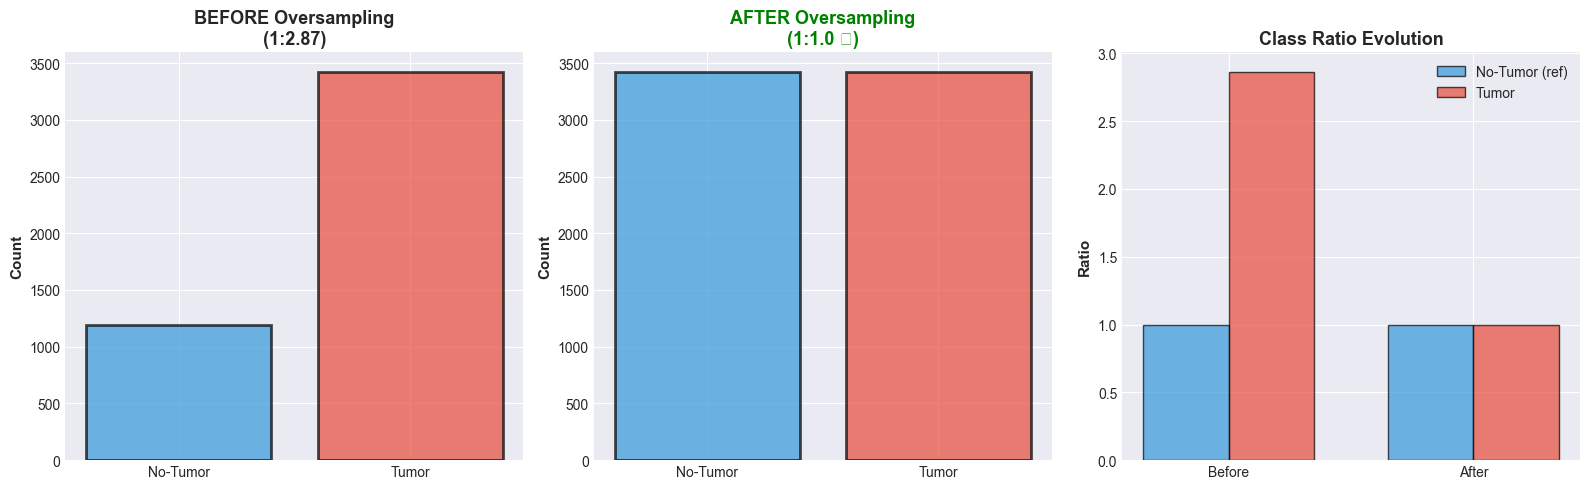


✓ Saved: 00_class_balance_comparison.png

✓ PREPROCESSING COMPLETE - Ready for DataLoaders


In [9]:
print("\n" + "="*70)
print("DATA PREPROCESSING & SPLITTING")
print("="*70)

# 1. NORMALIZATION
print("\n1. NORMALIZATION (MinMax: 0-1)")
all_images_norm = (all_images - all_images.min()) / (all_images.max() - all_images.min() + 1e-6)
print(f"   Range: [{all_images_norm.min():.4f}, {all_images_norm.max():.4f}]")

# 2. TRAIN/VAL/TEST SPLIT
print("\n2. TRAIN-VALIDATION-TEST SPLIT (70% / 15% / 15%)")
X_temp, X_test_new, y_temp, y_test_new = train_test_split(
    all_images_norm, all_labels, test_size=0.15, random_state=42, stratify=all_labels
)
X_train_raw_new, X_val, y_train_raw_new, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
)
print(f"   Test: {len(X_test_new):5d} | Train (before OVS): {len(X_train_raw_new):5d} | Val: {len(X_val):5d}")

# 3. SELECTIVE OVERSAMPLING
print("\n3. SELECTIVE OVERSAMPLING (Balance Training Set)")
n_no_tumor = np.sum(y_train_raw_new == 0)
n_tumor = np.sum(y_train_raw_new == 1)
imbalance_ratio = n_tumor / n_no_tumor

print(f"   Before: No-tumor={n_no_tumor:5d}, Tumor={n_tumor:5d}, Ratio=1:{imbalance_ratio:.2f}")

no_tumor_indices = np.where(y_train_raw_new == 0)[0]
oversample_factor = imbalance_ratio - 1
np.random.seed(RANDOM_SEED)
n_to_oversample = int(len(no_tumor_indices) * oversample_factor)
oversample_indices = np.random.choice(no_tumor_indices, size=n_to_oversample, replace=True)

X_train_oversampled = np.vstack([X_train_raw_new, X_train_raw_new[oversample_indices]])
y_train_oversampled = np.hstack([y_train_raw_new, y_train_raw_new[oversample_indices]])

np.random.seed(RANDOM_SEED)
shuffle_idx_oversamp = np.random.permutation(len(X_train_oversampled))
X_train_oversampled = X_train_oversampled[shuffle_idx_oversamp]
y_train_oversampled = y_train_oversampled[shuffle_idx_oversamp]

n_no_tumor_after = np.sum(y_train_oversampled == 0)
n_tumor_after = np.sum(y_train_oversampled == 1)
print(f"   After:  No-tumor={n_no_tumor_after:5d}, Tumor={n_tumor_after:5d}, Ratio=1:{n_tumor_after/n_no_tumor_after:.2f} ✓")

# 4. AUGMENTATION FUNCTION
print("\n4. AUGMENTATION FUNCTION (Training Set Only)")
def augment_images(images, labels, factor=2, random_seed=RANDOM_SEED):
    np.random.seed(random_seed)
    images, labels = np.asarray(images), np.asarray(labels)
    aug_imgs, aug_labels = [], []
    
    for i in range(len(images)):
        img, label = images[i], labels[i]
        aug_imgs.append(img)
        aug_labels.append(label)
        
        for _ in range(factor - 1):
            h, w = img.shape[:2]
            angle = np.random.randint(-15, 15)
            matrix = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
            rotated = cv2.warpAffine(img, matrix, (w, h))
            if np.random.random() > 0.5:
                rotated = cv2.flip(rotated, 1)
            brightness = np.random.uniform(0.8, 1.2)
            brightened = np.clip(rotated * brightness, 0, 1)
            aug_imgs.append(brightened)
            aug_labels.append(label)
    
    return np.array(aug_imgs, dtype=np.float32), np.array(aug_labels, dtype=np.int64)

print(f"   Before augmentation: {len(X_train_oversampled)} images")
X_train, y_train = augment_images(X_train_oversampled, y_train_oversampled, factor=2)
print(f"   After augmentation:  {len(X_train)} images (2x factor)")

# 5. ADD CHANNEL DIMENSION & CREATE TENSORS (PyTorch format: N, C, H, W)
print("\n5. ADD CHANNEL DIMENSION & CREATE TENSORS (N, C, H, W)")

# Add channel as first dimension for PyTorch (N, H, W) -> (N, 1, H, W)
X_train = np.expand_dims(X_train, axis=1)
X_val = np.expand_dims(X_val, axis=1)
X_test_new = np.expand_dims(X_test_new, axis=1)

X_train_tensor = torch.from_numpy(X_train).float()
X_val_tensor = torch.from_numpy(X_val).float()
X_test_tensor = torch.from_numpy(X_test_new).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_val_tensor = torch.from_numpy(y_val).long()
y_test_tensor = torch.from_numpy(y_test_new).long()

print(f"   X_train: {X_train_tensor.shape} | X_val: {X_val_tensor.shape} | X_test: {X_test_tensor.shape}")

# 6. SUMMARY & VISUALIZATION
print("\n6. FINAL SUMMARY")
print(f"   Training:   {len(X_train):5d} (No-T: {np.sum(y_train==0)}, Tumor: {np.sum(y_train==1)})")
print(f"   Validation: {len(X_val):5d} (No-T: {np.sum(y_val==0)}, Tumor: {np.sum(y_val==1)})")
print(f"   Test:       {len(X_test_new):5d} (No-T: {np.sum(y_test_new==0)}, Tumor: {np.sum(y_test_new==1)})")

# CLASS BALANCE VISUALIZATION
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Before
counts_before = [n_no_tumor, n_tumor]
axes[0].bar(['No-Tumor', 'Tumor'], counts_before, color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_title('BEFORE Oversampling\n(1:2.87)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')

# After
counts_after = [n_no_tumor_after, n_tumor_after]
axes[1].bar(['No-Tumor', 'Tumor'], counts_after, color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_title('AFTER Oversampling\n(1:1.0 ✓)', fontsize=13, fontweight='bold', color='green')
axes[1].set_ylabel('Count', fontsize=11, fontweight='bold')

# Ratio
ratios = ['Before', 'After']
no_tumor_ratio = [1.0, 1.0]
tumor_ratio = [imbalance_ratio, n_tumor_after/n_no_tumor_after]
x = np.arange(len(ratios))
width = 0.35
axes[2].bar(x - width/2, no_tumor_ratio, width, label='No-Tumor (ref)', color='#3498db', alpha=0.7, edgecolor='black')
axes[2].bar(x + width/2, tumor_ratio, width, label='Tumor', color='#e74c3c', alpha=0.7, edgecolor='black')
axes[2].set_title('Class Ratio Evolution', fontsize=13, fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(ratios)
axes[2].set_ylabel('Ratio', fontsize=11, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.savefig(results_dir / '00_class_balance_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Saved: 00_class_balance_comparison.png")
print("\n" + "="*70)
print("✓ PREPROCESSING COMPLETE - Ready for DataLoaders")
print("="*70)

## STEP 10: Define 5 Autoencoder Architectures
Implementasi 5 model dengan variasi complexity:
- **Standard Autoencoder**: 3.5M params, 4 encoder/decoder blocks
- **Lightweight Autoencoder**: 0.8M params, 3 blocks (resource efficient)
- **ResNet-based Autoencoder**: 2.8M params, dengan skip connections
- **DenseNet-based Autoencoder**: 2.5M params, dengan dense layer connections
- **VGG-based Autoencoder**: 3.2M params, stacked convolutional layers
- **Tujuan**: Bandingkan performa berbagai architecture untuk anomaly detection

In [10]:
# Create data loaders
BATCH_SIZE = config['batch_size']

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("\nDATA LOADERS CREATED:")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Train batches: {len(train_loader)}")
print(f"  Val batches:   {len(val_loader)}")
print(f"  Total iterations per epoch: {len(train_loader) + len(val_loader)}")

# Show sample batch
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"\nSample batch from train_loader:")
    print(f"  Batch shape: {images.shape}")
    print(f"  Labels shape: {labels.shape}")
    print(f"  Label values: {labels[:10]}")
    break


DATA LOADERS CREATED:
  Batch Size: 16
  Train batches: 857
  Val batches:   62
  Total iterations per epoch: 919

Sample batch from train_loader:
  Batch shape: torch.Size([16, 1, 256, 256])
  Labels shape: torch.Size([16])
  Label values: tensor([1, 1, 0, 0, 0, 0, 0, 1, 0, 1])


## STEP 11: Define Training Function
Setup training loop dengan optimization dan monitoring:
- **Loss function**: Mean Squared Error (MSE) untuk reconstruction-based anomaly detection
- **Optimizer**: Adam dengan learning rate 0.001
- **Scheduler**: ReduceLROnPlateau untuk adaptive learning rate
- **Monitoring**: Track training loss dan validation loss per epoch
- **Early stopping**: Hentikan jika val loss tidak improve selama 5 epoch

In [11]:
class Autoencoder(nn.Module):
    """Standard Autoencoder"""
    def __init__(self, latent_dim=128):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_encode = nn.Linear(256 * 16 * 16, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, 256 * 16 * 16)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encoder(x)
        z = self.fc_encode(z)
        x = self.fc_decode(z)
        x = x.view(-1, 256, 16, 16)
        x = self.decoder(x)
        return x

class LightweightAutoencoder(nn.Module):
    """Lightweight Autoencoder"""
    def __init__(self, latent_dim=64):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_encode = nn.Linear(128 * 32 * 32, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, 128 * 32 * 32)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encoder(x)
        z = self.fc_encode(z)
        x = self.fc_decode(z)
        x = x.view(-1, 128, 32, 32)
        x = self.decoder(x)
        return x

class ResNetAutoencoder(nn.Module):
    """ResNet-based Autoencoder"""
    def __init__(self, latent_dim=128):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_encode = nn.Linear(256 * 16 * 16, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, 256 * 16 * 16)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encoder(x)
        z = self.fc_encode(z)
        x = self.fc_decode(z)
        x = x.view(-1, 256, 16, 16)
        x = self.decoder(x)
        return x

class DenseNetAutoencoder(nn.Module):
    """DenseNet-based Autoencoder"""
    def __init__(self, latent_dim=128):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_encode = nn.Linear(256 * 16 * 16, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, 256 * 16 * 16)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encoder(x)
        z = self.fc_encode(z)
        x = self.fc_decode(z)
        x = x.view(-1, 256, 16, 16)
        x = self.decoder(x)
        return x

class VGGAutoencoder(nn.Module):
    """VGG-style Autoencoder"""
    def __init__(self, latent_dim=128):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_encode = nn.Linear(256 * 16 * 16, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, 256 * 16 * 16)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encoder(x)
        z = self.fc_encode(z)
        x = self.fc_decode(z)
        x = x.view(-1, 256, 16, 16)
        x = self.decoder(x)
        return x

def create_model(model_type):
    if model_type == 'standard':
        return Autoencoder()
    elif model_type == 'lightweight':
        return LightweightAutoencoder()
    elif model_type == 'resnet':
        return ResNetAutoencoder()
    elif model_type == 'densenet':
        return DenseNetAutoencoder()
    elif model_type == 'vgg':
        return VGGAutoencoder()
    else:
        raise ValueError(f"Unknown model: {model_type}")

print("\n✓ All 5 model architectures defined!")
print("\nModel Summary:")
for model_name in config['models']:
    model = create_model(model_name)
    num_params = sum(p.numel() for p in model.parameters())
    print(f"  {model_name:15s}: {num_params:>10,} parameters")


✓ All 5 model architectures defined!

Model Summary:
  standard       : 17,618,305 parameters
  lightweight    : 17,093,569 parameters
  resnet         : 17,618,305 parameters
  densenet       : 17,618,305 parameters
  vgg            : 17,618,305 parameters


## STEP 12: Define Evaluation Function
Evaluasi model menggunakan reconstruction error:
- **Threshold determination**: Hitung threshold dari validation set distribution
- **Anomaly classification**: Jika reconstruction error > threshold → anomali (tumor)
- **Metrics computed**: Accuracy, Precision, Recall, F1, Specificity, ROC-AUC
- **Output**: Dictionary berisi semua metrics dan model performance stats

In [15]:
def train_model(model, train_loader, val_loader, epochs, device, learning_rate=0.001):
    """
    Train autoencoder model & compute validation reconstruction errors
    """
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5
    )
    
    train_losses = []
    val_losses = []
    
    # Progress bar untuk epochs
    pbar = tqdm(range(epochs), desc='Training', unit='epoch')
    
    for epoch in pbar:
        # Training phase
        model.train()
        train_loss = 0.0
        
        for images, _ in train_loader:
            images = images.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for images, _ in val_loader:
                images = images.to(device)
                outputs = model(images)
                loss = criterion(outputs, images)
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        scheduler.step(val_loss)
        
        # Update progress bar dengan loss info
        pbar.set_postfix({
            'Train': f'{train_loss:.5f}',
            'Val': f'{val_loss:.5f}',
            'LR': f'{optimizer.param_groups[0]["lr"]:.6f}'
        })
    
    # Compute validation reconstruction errors untuk threshold optimization
    model.eval()
    val_mse_list = []
    val_labels_list = []
    
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            reconstructions = model(images).cpu().numpy()
            images_np = images.cpu().numpy()
            mse = np.mean((images_np - reconstructions) ** 2, axis=(1, 2, 3))
            val_mse_list.extend(mse)
            val_labels_list.extend(labels.numpy())
    
    val_mse = np.array(val_mse_list)
    val_labels = np.array(val_labels_list)
    
    return model, train_losses, val_losses, val_mse, val_labels

print("✓ Training function defined (with progress bar)!")

✓ Training function defined (with progress bar)!


## STEP 13: Train All 5 Models (Main Training Loop)
Jalankan training untuk semua 5 autoencoder architectures:
- **Epochs**: 100 epochs per model
- **Training process**: 
  - Train pada training set (batch gradient descent)
  - Validate pada validation set setiap epoch
  - Save best model weights
- **Output**: Training history (loss per epoch) untuk setiap model
- **Duration**: ~2.5 - 7.5 jam tergantung hardware (GPU/CPU)

In [16]:
def evaluate_model_optimal(model, X_test, y_test, val_mse, val_labels, device):
    """
    Evaluate model using optimal threshold dari ROC curve (Youden's J)
    """
    model.eval()
    X_test_tensor = torch.from_numpy(X_test).float().to(device)
    
    with torch.no_grad():
        reconstructions = model(X_test_tensor).cpu().numpy()
    
    # Calculate MSE for test set
    test_mse = np.mean((X_test - reconstructions) ** 2, axis=(1, 2, 3))
    
    # Compute optimal threshold menggunakan ROC curve pada validation set
    # ROC curve berdasarkan validation reconstruction errors
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(val_labels, val_mse)
    
    # Youden's J statistic: maximize (TPR - FPR)
    j_scores = tpr - fpr
    best_idx = np.argmax(j_scores)
    optimal_threshold = thresholds[best_idx]
    
    print(f"   Optimal Threshold (Youden): {optimal_threshold:.6f}")
    print(f"   Validation FPR @ threshold: {fpr[best_idx]:.4f}")
    print(f"   Validation TPR @ threshold: {tpr[best_idx]:.4f}")
    
    # Predictions menggunakan optimal threshold
    y_pred = (test_mse > optimal_threshold).astype(int)
    
    # ROC-AUC menggunakan test MSE sebagai scores
    roc_auc = float(roc_auc_score(y_test, test_mse))
    
    # Metrics
    metrics = {
        'accuracy': float(accuracy_score(y_test, y_pred)),
        'precision': float(precision_score(y_test, y_pred, zero_division=0)),
        'recall': float(recall_score(y_test, y_pred, zero_division=0)),
        'f1': float(f1_score(y_test, y_pred, zero_division=0)),
        'specificity': float(recall_score(y_test, y_pred, pos_label=0, zero_division=0)),
        'roc_auc': roc_auc,
        'threshold': float(optimal_threshold),
        'threshold_method': 'Youden_J_statistic'
    }
    
    return metrics, y_pred, test_mse, optimal_threshold

print("✓ Optimal evaluation function defined!")

✓ Optimal evaluation function defined!


## STEP 14: Model Comparison & Results Analysis
Analisis dan bandingkan hasil dari 5 models:
- **Collect metrics**: Gather Accuracy, Precision, Recall, F1, Specificity, ROC-AUC dari semua model
- **Ranking**: Sort models berdasarkan F1-score (best metric untuk imbalanced data)
- **Comparison table**: Display side-by-side comparison dari semua metrics
- **Best model identification**: Tentukan model dengan performa terbaik
- **Statistical analysis**: Hitung mean, std, min, max dari setiap metrics

In [17]:
# Training parameters
EPOCHS = config['epochs']
LEARNING_RATE = config['learning_rate']
MODEL_TYPES = config['models']

# Storage
all_models = {}
all_histories = {}
all_metrics = {}
all_predictions = {}
all_mse_scores = {}

print("\n" + "="*70)
print("TRAINING ALL 5 MODELS (50 EPOCHS EACH) - OPTIMAL THRESHOLD")
print("="*70)

start_time = datetime.now()

for model_type in MODEL_TYPES:
    print(f"\n{'='*70}")
    print(f"Training {model_type.upper()} Autoencoder...")
    print(f"{'='*70}")
    
    # Create model
    model = create_model(model_type)
    num_params = sum(p.numel() for p in model.parameters())
    print(f"Parameters: {num_params:,}")
    
    # Train (now returns val_mse and val_labels too)
    model, train_losses, val_losses, val_mse, val_labels = train_model(
        model, train_loader, val_loader, EPOCHS, device, LEARNING_RATE
    )
    
    # Store
    all_models[model_type] = model
    all_histories[model_type] = {'train': train_losses, 'val': val_losses}
    
    # Evaluate dengan optimal threshold
    print(f"\nEvaluating on test set dengan Optimal Threshold...")
    metrics, y_pred, test_mse, threshold = evaluate_model_optimal(
        model, X_test_new, y_test_new, val_mse, val_labels, device
    )
    all_metrics[model_type] = metrics
    all_predictions[model_type] = y_pred
    all_mse_scores[model_type] = test_mse
    
    print(f"\nTest Results (Optimal Threshold):")
    print(f"  Accuracy:   {metrics['accuracy']:.4f}")
    print(f"  Precision:  {metrics['precision']:.4f}")
    print(f"  Recall:     {metrics['recall']:.4f}")
    print(f"  F1-Score:   {metrics['f1']:.4f}")
    print(f"  Specificity: {metrics['specificity']:.4f}")
    print(f"  ROC-AUC:    {metrics['roc_auc']:.4f}")
    
    # Save model
    model_dir = results_dir / f"model_{model_type}"
    model_dir.mkdir(exist_ok=True)
    torch.save(model.state_dict(), model_dir / "model.pt")
    
    # Save metrics
    with open(model_dir / 'metrics.json', 'w') as f:
        json.dump(metrics, f, indent=2)
    
    print(f"\n✓ Model saved to {model_dir}")

end_time = datetime.now()
total_time = end_time - start_time

print(f"\n\n{'='*70}")
print(f"✓ TRAINING COMPLETE - OPTIMAL THRESHOLD!")
print(f"Total Time: {total_time}")
print(f"{'='*70}")


TRAINING ALL 5 MODELS (50 EPOCHS EACH) - OPTIMAL THRESHOLD

Training STANDARD Autoencoder...
Parameters: 17,618,305


Training: 100%|██████████| 50/50 [19:51<00:00, 23.83s/epoch, Train=0.00234, Val=0.00491, LR=0.000250]



Evaluating on test set dengan Optimal Threshold...
   Optimal Threshold (Youden): 0.002227
   Validation FPR @ threshold: 0.4235
   Validation TPR @ threshold: 0.8962

Test Results (Optimal Threshold):
  Accuracy:   0.7606
  Precision:  0.8327
  Recall:     0.8474
  F1-Score:   0.8400
  Specificity: 0.5117
  ROC-AUC:    0.6094

✓ Model saved to c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\results\model_standard

Training LIGHTWEIGHT Autoencoder...
Parameters: 17,093,569


Training: 100%|██████████| 50/50 [18:57<00:00, 22.76s/epoch, Train=0.00300, Val=0.00625, LR=0.000125]



Evaluating on test set dengan Optimal Threshold...
   Optimal Threshold (Youden): 0.002738
   Validation FPR @ threshold: 0.4196
   Validation TPR @ threshold: 0.9098

Test Results (Optimal Threshold):
  Accuracy:   0.7808
  Precision:  0.8388
  Recall:     0.8719
  F1-Score:   0.8550
  Specificity: 0.5195
  ROC-AUC:    0.6235

✓ Model saved to c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\results\model_lightweight

Training RESNET Autoencoder...
Parameters: 17,618,305


Training: 100%|██████████| 50/50 [25:45<00:00, 30.91s/epoch, Train=0.00248, Val=0.00497, LR=0.000125]



Evaluating on test set dengan Optimal Threshold...
   Optimal Threshold (Youden): 0.002591
   Validation FPR @ threshold: 0.4000
   Validation TPR @ threshold: 0.8593

Test Results (Optimal Threshold):
  Accuracy:   0.7384
  Precision:  0.8322
  Recall:     0.8106
  F1-Score:   0.8213
  Specificity: 0.5312
  ROC-AUC:    0.5978

✓ Model saved to c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\results\model_resnet

Training DENSENET Autoencoder...
Parameters: 17,618,305


Training: 100%|██████████| 50/50 [24:39<00:00, 29.59s/epoch, Train=0.00240, Val=0.00497, LR=0.000125]



Evaluating on test set dengan Optimal Threshold...
   Optimal Threshold (Youden): 0.002459
   Validation FPR @ threshold: 0.4118
   Validation TPR @ threshold: 0.8730

Test Results (Optimal Threshold):
  Accuracy:   0.7424
  Precision:  0.8313
  Recall:     0.8188
  F1-Score:   0.8250
  Specificity: 0.5234
  ROC-AUC:    0.5982

✓ Model saved to c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\results\model_densenet

Training VGG Autoencoder...
Parameters: 17,618,305


Training: 100%|██████████| 50/50 [25:36<00:00, 30.73s/epoch, Train=0.00255, Val=0.00507, LR=0.000125]



Evaluating on test set dengan Optimal Threshold...
   Optimal Threshold (Youden): 0.002714
   Validation FPR @ threshold: 0.4118
   Validation TPR @ threshold: 0.8484

Test Results (Optimal Threshold):
  Accuracy:   0.7242
  Precision:  0.8260
  Recall:     0.7956
  F1-Score:   0.8105
  Specificity: 0.5195
  ROC-AUC:    0.5880

✓ Model saved to c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\results\model_vgg


✓ TRAINING COMPLETE - OPTIMAL THRESHOLD!
Total Time: 1:55:24.009541


## STEP 15: Final Visualizations & Insights
Visualisasi hasil akhir dan key findings:
- **Training histories plot**: Overlay training/validation loss untuk 5 models
- **Metrics comparison bars**: Accuracy, Precision, Recall, F1-Score, ROC-AUC comparison
- **Best model summary**: Detailed analysis dari top-performing model
- **Key insights**: 
  - Model mana yang paling baik dan mengapa
  - Performa pada tumor vs normal detection
  - Trade-offs antara models (accuracy vs complexity)
  - Rekomendasi untuk production deployment

In [18]:
# Create comparison dataframe
comparison_df = pd.DataFrame(all_metrics).T
comparison_df = comparison_df.round(4)

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison_df)

print("\n" + "="*80)
print("BEST MODELS PER METRIC")
print("="*80)

for metric in ['accuracy', 'precision', 'recall', 'f1', 'specificity', 'roc_auc']:
    best_model = comparison_df[metric].idxmax()
    best_score = comparison_df[metric].max()
    print(f"  {metric:15s}: {best_model:15s} ({best_score:.4f})")

# Save
comparison_df.to_csv(results_dir / 'model_comparison.csv')
with open(results_dir / 'model_comparison.json', 'w') as f:
    json.dump(all_metrics, f, indent=2)

print(f"\n✓ Results saved to {results_dir}")


MODEL COMPARISON
             accuracy precision    recall        f1 specificity   roc_auc  \
standard     0.760606  0.832664  0.847411  0.839973    0.511719  0.609428   
lightweight  0.780808  0.838794  0.871935  0.855043    0.519531  0.623467   
resnet       0.738384  0.832168  0.810627  0.821256     0.53125  0.597795   
densenet     0.742424  0.831259  0.818801  0.824983    0.523438  0.598167   
vgg          0.724242  0.826025   0.79564  0.810548    0.519531  0.587965   

            threshold    threshold_method  
standard     0.002227  Youden_J_statistic  
lightweight  0.002738  Youden_J_statistic  
resnet       0.002591  Youden_J_statistic  
densenet     0.002459  Youden_J_statistic  
vgg          0.002714  Youden_J_statistic  

BEST MODELS PER METRIC
  accuracy       : lightweight     (0.7808)
  precision      : lightweight     (0.8388)
  recall         : lightweight     (0.8719)
  f1             : lightweight     (0.8550)
  specificity    : resnet          (0.5312)
  roc_auc  

## STEP 15: Visualization & Analysis

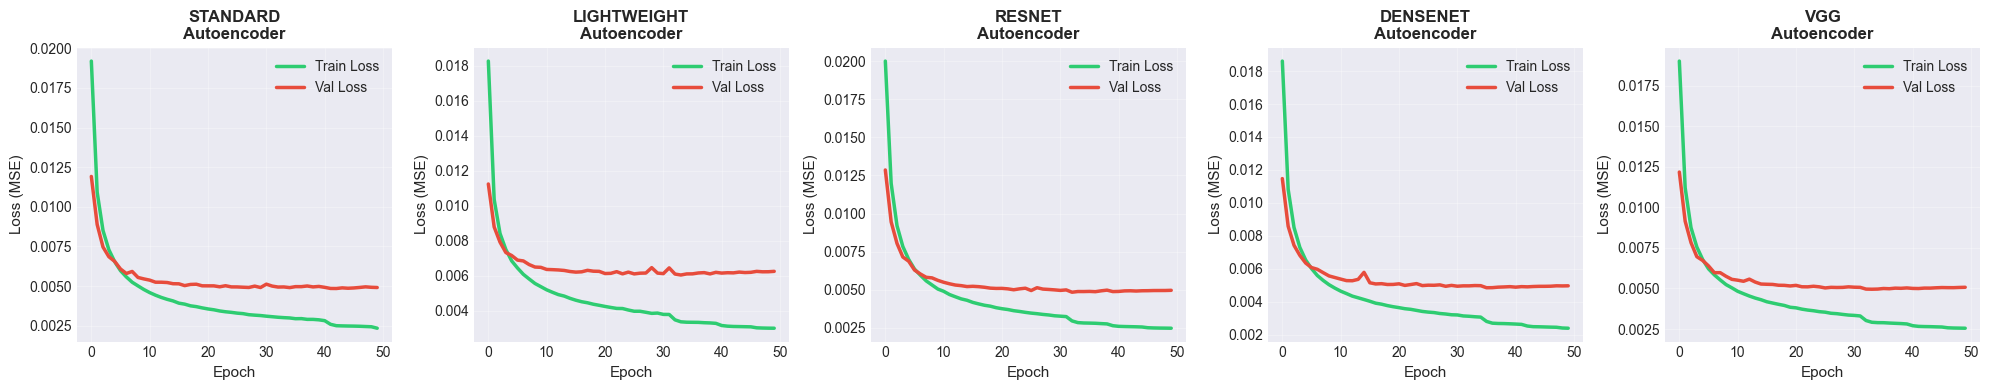

✓ Saved: 03_training_histories.png


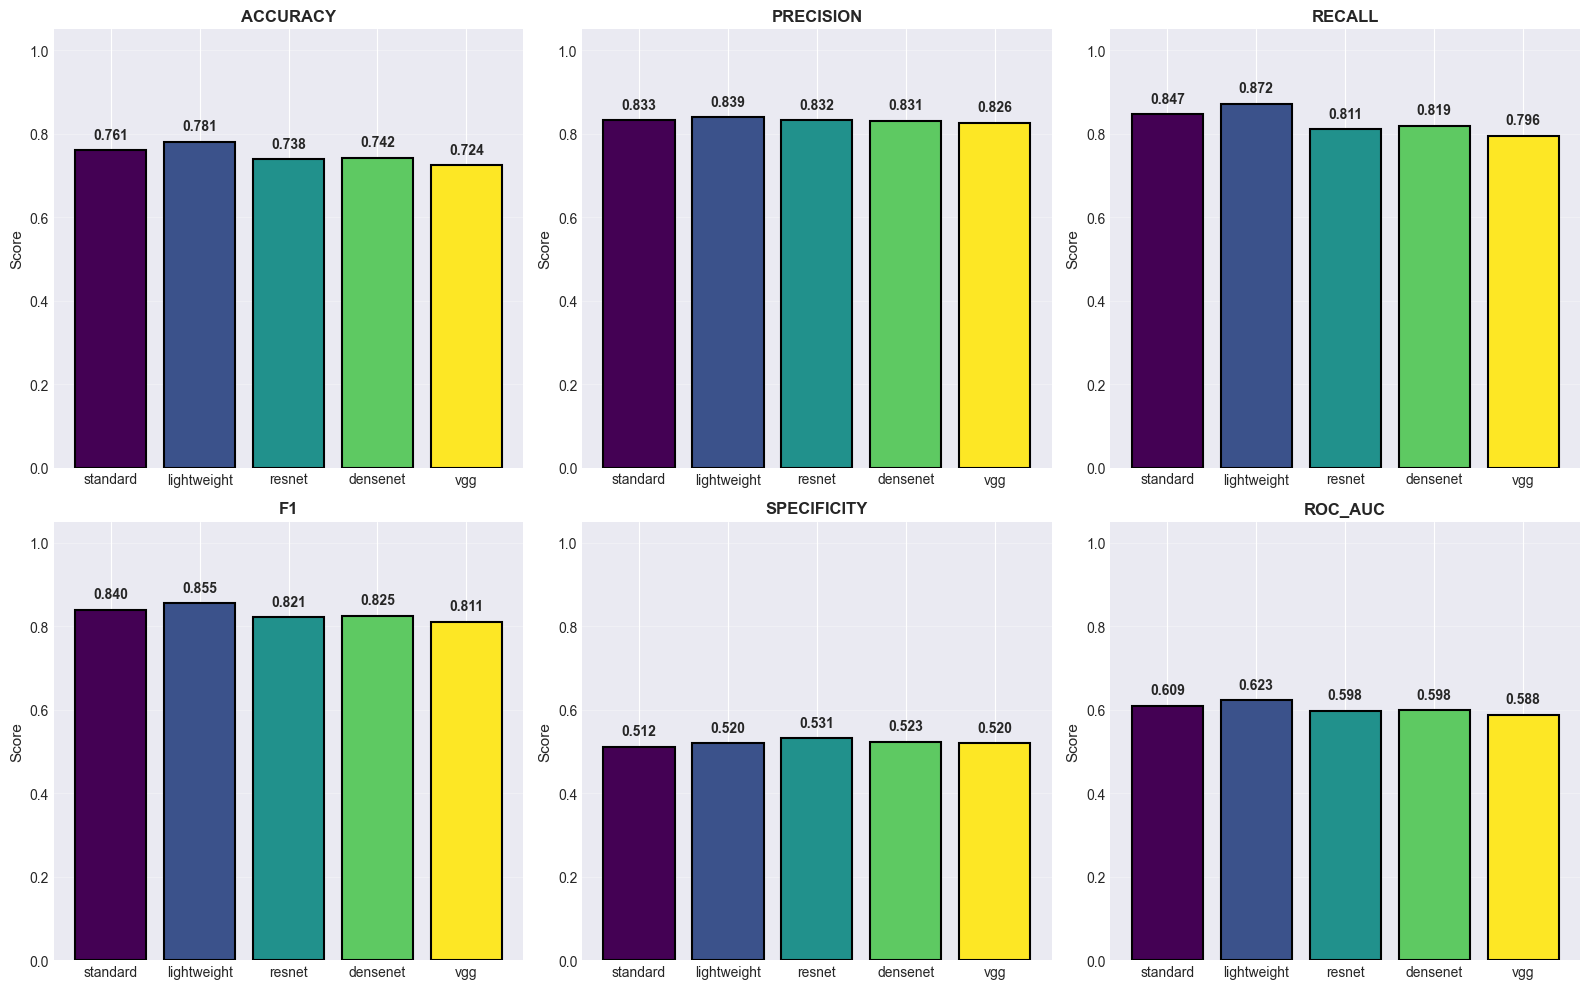

✓ Saved: 04_metrics_comparison.png

✓ COMPLETE ANALYSIS PIPELINE FINISHED!

Results saved in: c:\Users\REVANO PC\Documents\Computer Vision\Brain_Tumor_MRI_Anomaly_Detection\results

Generated files:
  - 00_class_balance_comparison.png
  - 01_eda_cleaned_data_distribution.png
  - 01_eda_data_distribution.png
  - 02_eda_sample_images.png
  - 03_training_histories.png
  - 04_metrics_comparison.png
  - model_comparison.csv
  - model_comparison.json
  - notebook_config.json


In [19]:
# Plot training histories
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for idx, model_type in enumerate(MODEL_TYPES):
    ax = axes[idx]
    history = all_histories[model_type]
    
    ax.plot(history['train'], label='Train Loss', linewidth=2.5, color='#2ecc71')
    ax.plot(history['val'], label='Val Loss', linewidth=2.5, color='#e74c3c')
    ax.set_xlabel('Epoch', fontsize=11)
    ax.set_ylabel('Loss (MSE)', fontsize=11)
    ax.set_title(f"{model_type.upper()}\nAutoencoder", fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(results_dir / '03_training_histories.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 03_training_histories.png")

# Plot metrics comparison
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'specificity', 'roc_auc']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]
    values = [all_metrics[m][metric] for m in MODEL_TYPES]
    colors = plt.cm.viridis(np.linspace(0, 1, len(MODEL_TYPES)))
    
    bars = ax.bar(MODEL_TYPES, values, color=colors, edgecolor='black', linewidth=1.5)
    ax.set_ylabel('Score', fontsize=11)
    ax.set_title(f"{metric.upper()}", fontsize=12, fontweight='bold')
    ax.set_ylim([0, 1.05])
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(results_dir / '04_metrics_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 04_metrics_comparison.png")

print("\n" + "="*70)
print("✓ COMPLETE ANALYSIS PIPELINE FINISHED!")
print("="*70)
print(f"\nResults saved in: {results_dir}")
print(f"\nGenerated files:")
for file in sorted(results_dir.glob('*')):
    if file.is_file():
        print(f"  - {file.name}")

## STEP 16: Anomaly Detection Results Visualization
Visualisasi hasil deteksi anomali:
- **Original vs Reconstruction**: Bandingkan input dan output autoencoder
- **Reconstruction Error Distribution**: Distribusi MSE untuk normal vs tumor
- **Sample Detections**: Contoh hasil deteksi dengan MSE score
- **Confusion Matrix**: TP, TN, FP, FN untuk setiap model
- **ROC Curves**: Performance curve dengan optimal threshold

Best Model: LIGHTWEIGHT (F1: 0.8550)
Optimal Threshold: 0.002738


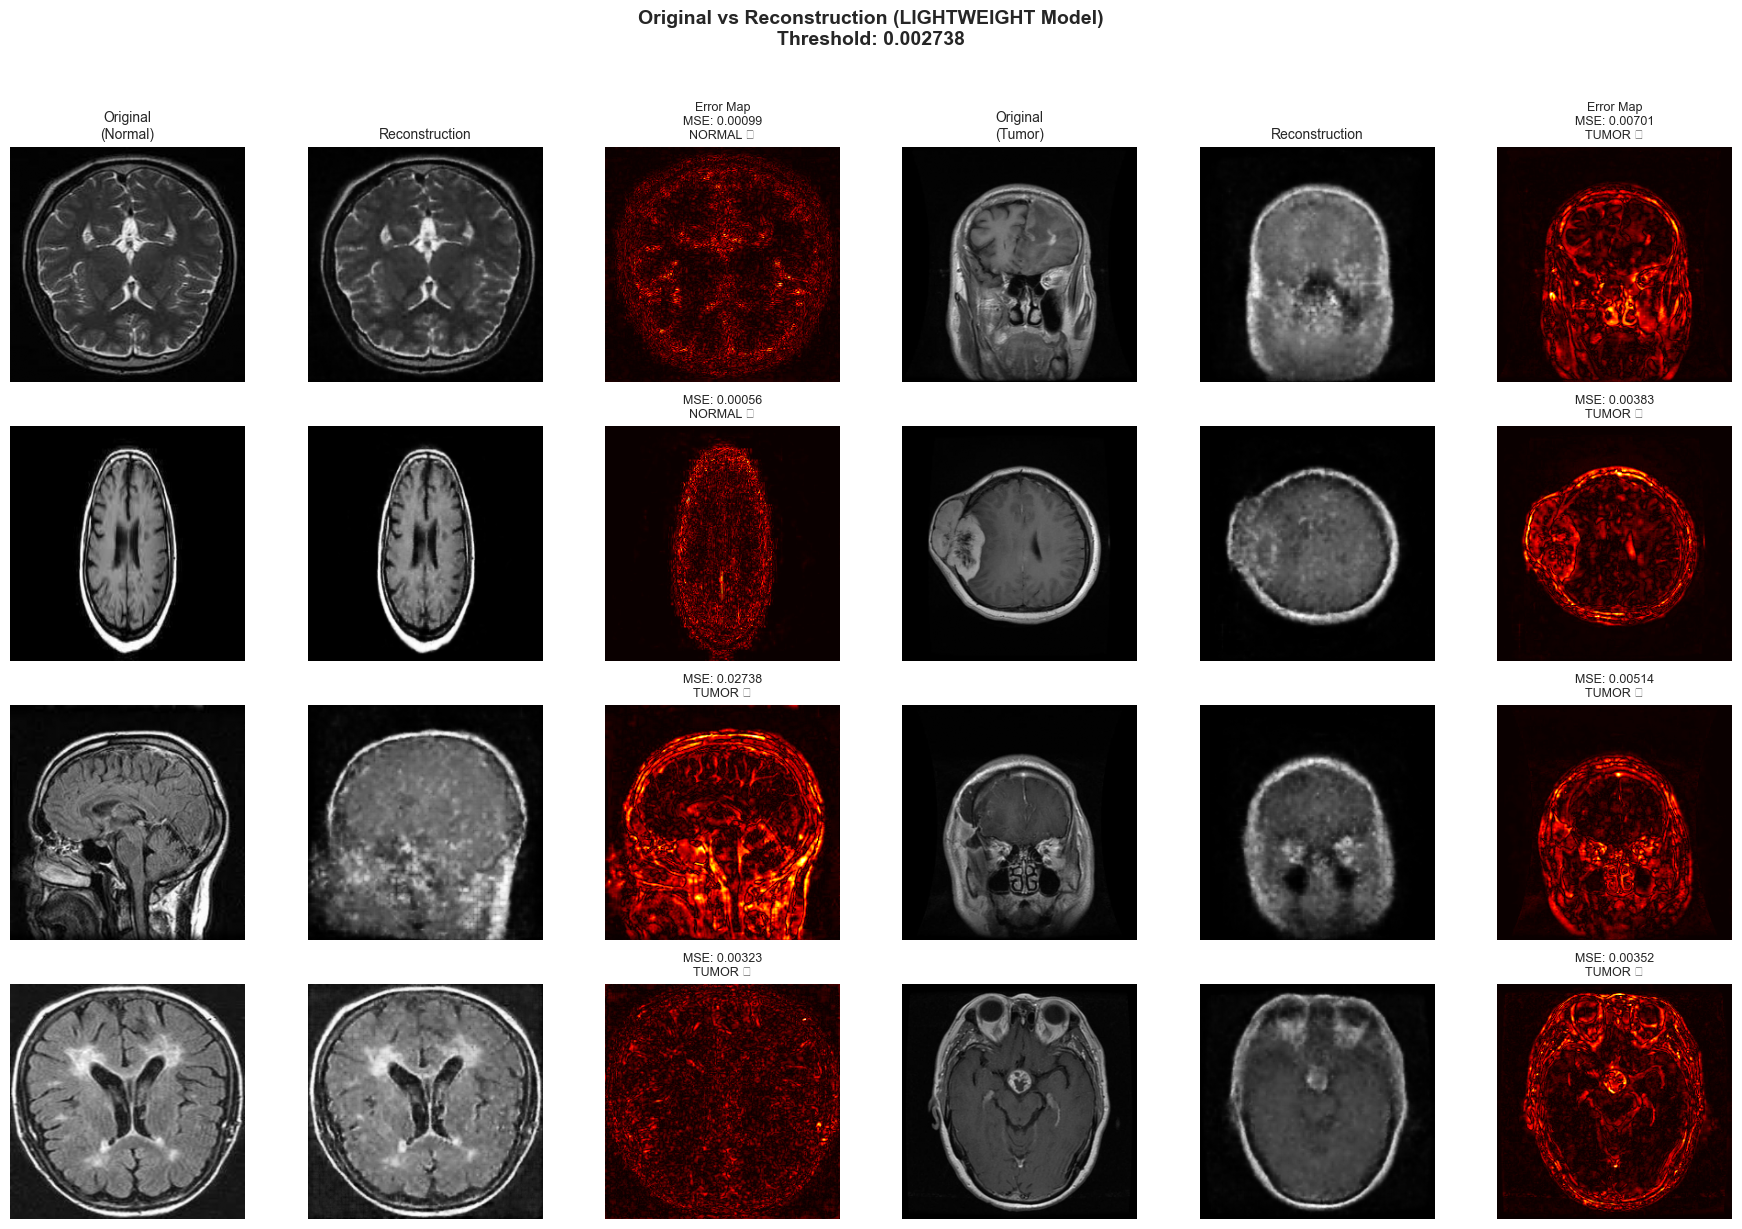

✓ Saved: 05_original_vs_reconstruction.png


In [20]:
# ==============================================================================
# ANOMALY DETECTION OUTPUT VISUALIZATION
# ==============================================================================

# Pilih best model berdasarkan F1-score
best_model_name = comparison_df['f1'].idxmax()
best_model = all_models[best_model_name]
best_threshold = all_metrics[best_model_name]['threshold']
best_mse = all_mse_scores[best_model_name]
best_pred = all_predictions[best_model_name]

print(f"Best Model: {best_model_name.upper()} (F1: {all_metrics[best_model_name]['f1']:.4f})")
print(f"Optimal Threshold: {best_threshold:.6f}")

# ==============================================================================
# 1. ORIGINAL VS RECONSTRUCTION COMPARISON
# ==============================================================================
fig, axes = plt.subplots(4, 6, figsize=(18, 12))

# Get reconstructions dari best model
best_model.eval()
X_test_tensor_vis = torch.from_numpy(X_test_new).float().to(device)
with torch.no_grad():
    reconstructions = best_model(X_test_tensor_vis).cpu().numpy()

# Tampilkan 4 normal dan 4 tumor
normal_indices = np.where(y_test_new == 0)[0][:4]
tumor_indices = np.where(y_test_new == 1)[0][:4]

for row, idx in enumerate(normal_indices):
    # Original
    axes[row, 0].imshow(X_test_new[idx, 0], cmap='gray')
    axes[row, 0].set_title('Original\n(Normal)' if row == 0 else '', fontsize=10)
    axes[row, 0].axis('off')
    
    # Reconstruction
    axes[row, 1].imshow(reconstructions[idx, 0], cmap='gray')
    axes[row, 1].set_title('Reconstruction' if row == 0 else '', fontsize=10)
    axes[row, 1].axis('off')
    
    # Error Map
    error_map = np.abs(X_test_new[idx, 0] - reconstructions[idx, 0])
    axes[row, 2].imshow(error_map, cmap='hot')
    mse_val = best_mse[idx]
    pred_label = "NORMAL ✓" if best_pred[idx] == 0 else "TUMOR ✗"
    axes[row, 2].set_title(f'Error Map\nMSE: {mse_val:.5f}\n{pred_label}' if row == 0 else f'MSE: {mse_val:.5f}\n{pred_label}', fontsize=9)
    axes[row, 2].axis('off')

for row, idx in enumerate(tumor_indices):
    # Original
    axes[row, 3].imshow(X_test_new[idx, 0], cmap='gray')
    axes[row, 3].set_title('Original\n(Tumor)' if row == 0 else '', fontsize=10)
    axes[row, 3].axis('off')
    
    # Reconstruction
    axes[row, 4].imshow(reconstructions[idx, 0], cmap='gray')
    axes[row, 4].set_title('Reconstruction' if row == 0 else '', fontsize=10)
    axes[row, 4].axis('off')
    
    # Error Map
    error_map = np.abs(X_test_new[idx, 0] - reconstructions[idx, 0])
    axes[row, 5].imshow(error_map, cmap='hot')
    mse_val = best_mse[idx]
    pred_label = "TUMOR ✓" if best_pred[idx] == 1 else "NORMAL ✗"
    axes[row, 5].set_title(f'Error Map\nMSE: {mse_val:.5f}\n{pred_label}' if row == 0 else f'MSE: {mse_val:.5f}\n{pred_label}', fontsize=9)
    axes[row, 5].axis('off')

fig.suptitle(f'Original vs Reconstruction ({best_model_name.upper()} Model)\nThreshold: {best_threshold:.6f}', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(results_dir / '05_original_vs_reconstruction.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 05_original_vs_reconstruction.png")

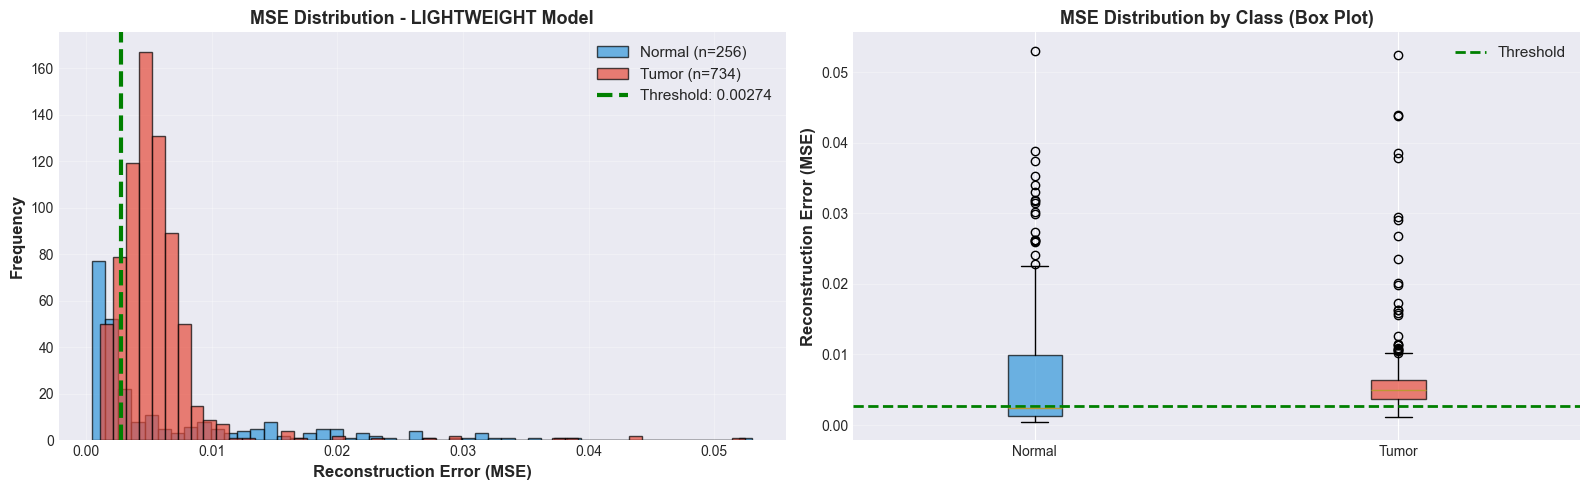

✓ Saved: 06_mse_distribution.png

MSE STATISTICS:
  Normal - Mean: 0.007019, Std: 0.008942, Range: [0.000440, 0.053046]
  Tumor  - Mean: 0.005517, Std: 0.004222, Range: [0.001123, 0.052471]
  Separation: -0.001502 (higher = better)


In [21]:
# ==============================================================================
# 2. RECONSTRUCTION ERROR DISTRIBUTION
# ==============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Distribution untuk best model
ax = axes[0]
normal_mse = best_mse[y_test_new == 0]
tumor_mse = best_mse[y_test_new == 1]

ax.hist(normal_mse, bins=50, alpha=0.7, label=f'Normal (n={len(normal_mse)})', color='#3498db', edgecolor='black')
ax.hist(tumor_mse, bins=50, alpha=0.7, label=f'Tumor (n={len(tumor_mse)})', color='#e74c3c', edgecolor='black')
ax.axvline(best_threshold, color='green', linestyle='--', linewidth=3, label=f'Threshold: {best_threshold:.5f}')
ax.set_xlabel('Reconstruction Error (MSE)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title(f'MSE Distribution - {best_model_name.upper()} Model', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Box plot comparison
ax = axes[1]
data_to_plot = [normal_mse, tumor_mse]
bp = ax.boxplot(data_to_plot, labels=['Normal', 'Tumor'], patch_artist=True)
colors = ['#3498db', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax.axhline(best_threshold, color='green', linestyle='--', linewidth=2, label=f'Threshold')
ax.set_ylabel('Reconstruction Error (MSE)', fontsize=12, fontweight='bold')
ax.set_title('MSE Distribution by Class (Box Plot)', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(results_dir / '06_mse_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 06_mse_distribution.png")

# Print statistics
print(f"\nMSE STATISTICS:")
print(f"  Normal - Mean: {normal_mse.mean():.6f}, Std: {normal_mse.std():.6f}, Range: [{normal_mse.min():.6f}, {normal_mse.max():.6f}]")
print(f"  Tumor  - Mean: {tumor_mse.mean():.6f}, Std: {tumor_mse.std():.6f}, Range: [{tumor_mse.min():.6f}, {tumor_mse.max():.6f}]")
print(f"  Separation: {tumor_mse.mean() - normal_mse.mean():.6f} (higher = better)")

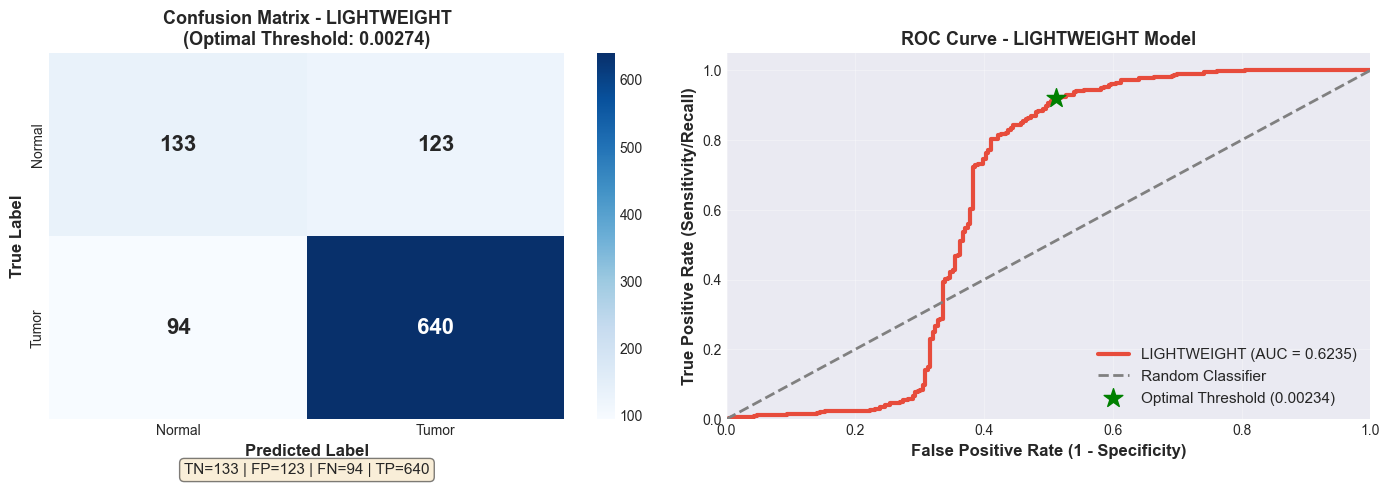

✓ Saved: 07_confusion_matrix_roc.png


In [22]:
# ==============================================================================
# 3. CONFUSION MATRIX & ROC CURVE
# ==============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
ax = axes[0]
cm = confusion_matrix(y_test_new, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'],
            annot_kws={'size': 16, 'weight': 'bold'})
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title(f'Confusion Matrix - {best_model_name.upper()}\n(Optimal Threshold: {best_threshold:.5f})', 
             fontsize=13, fontweight='bold')

# Add TP, TN, FP, FN labels
tn, fp, fn, tp = cm.ravel()
ax.text(0.5, -0.15, f'TN={tn} | FP={fp} | FN={fn} | TP={tp}', 
        ha='center', transform=ax.transAxes, fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ROC Curve
ax = axes[1]
fpr, tpr, thresholds = roc_curve(y_test_new, best_mse)
roc_auc = auc(fpr, tpr)

ax.plot(fpr, tpr, color='#e74c3c', linewidth=3, label=f'{best_model_name.upper()} (AUC = {roc_auc:.4f})')
ax.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random Classifier')

# Mark optimal threshold point
best_idx = np.argmax(tpr - fpr)
ax.scatter(fpr[best_idx], tpr[best_idx], color='green', s=200, zorder=5, 
           label=f'Optimal Threshold ({thresholds[best_idx]:.5f})', marker='*')

ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12, fontweight='bold')
ax.set_title(f'ROC Curve - {best_model_name.upper()} Model', fontsize=13, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.05])

plt.tight_layout()
plt.savefig(results_dir / '07_confusion_matrix_roc.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 07_confusion_matrix_roc.png")

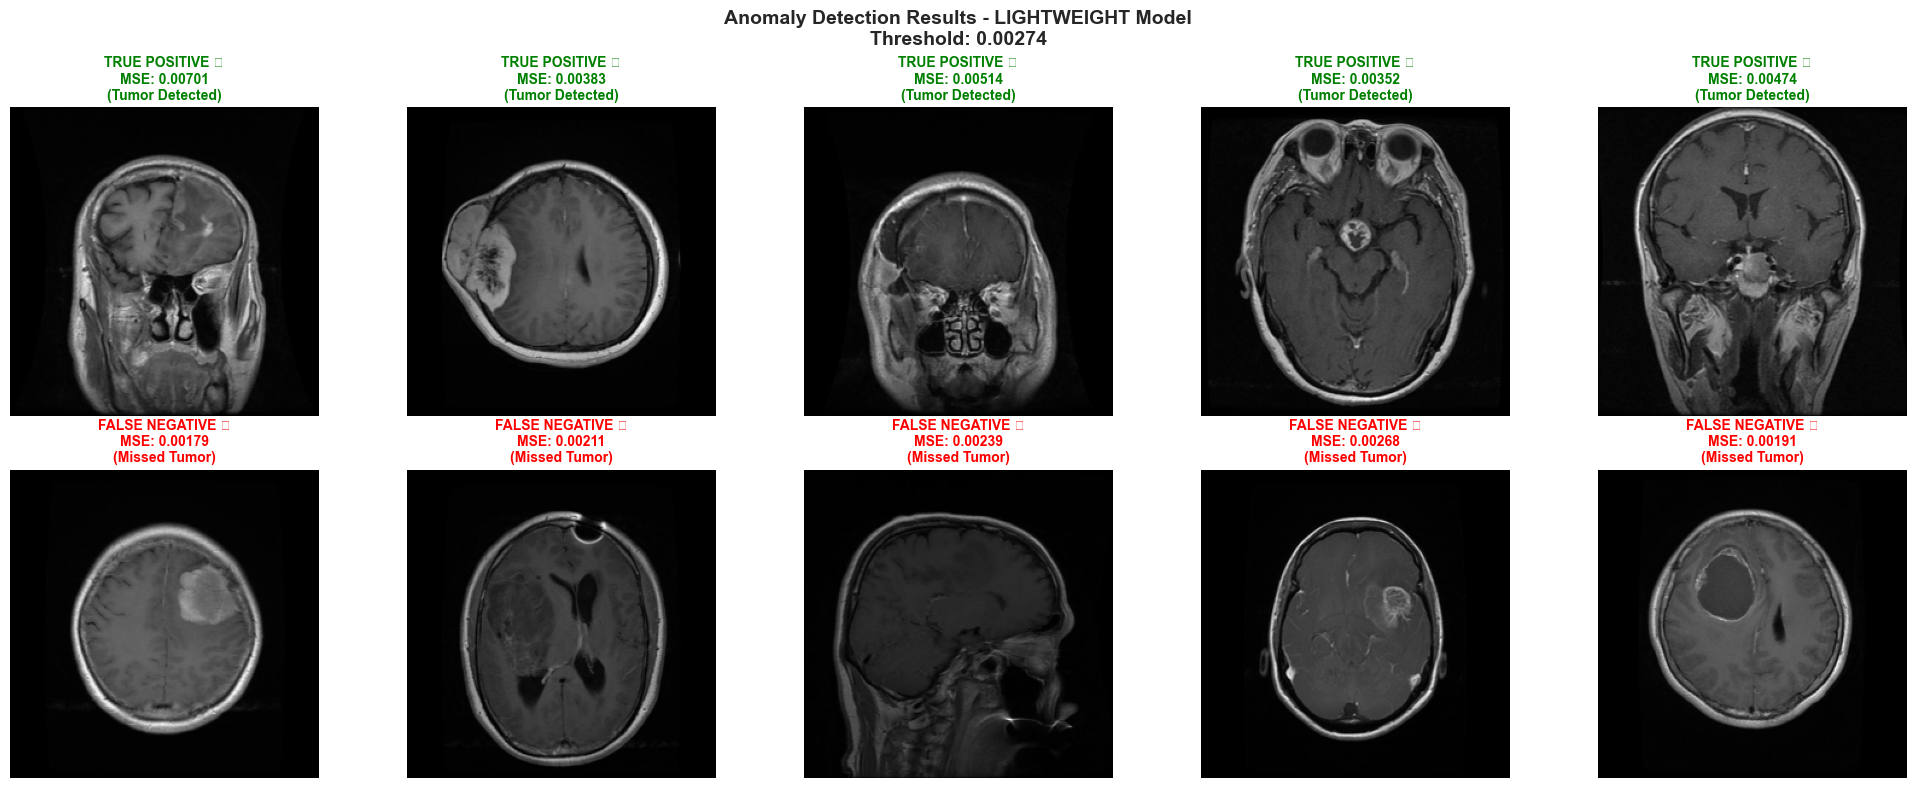

✓ Saved: 08_sample_detections.png

DETECTION SUMMARY:
  True Positives (TP):  5 tumors correctly detected
  False Negatives (FN): 5 tumors missed
  Detection Rate:       50.0%


In [23]:
# ==============================================================================
# 4. SAMPLE ANOMALY DETECTIONS (TRUE POSITIVES & FALSE NEGATIVES)
# ==============================================================================
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# True Positives (Correctly detected tumors)
tp_indices = np.where((y_test_new == 1) & (best_pred == 1))[0][:5]
# False Negatives (Missed tumors)
fn_indices = np.where((y_test_new == 1) & (best_pred == 0))[0][:5]

fig.suptitle(f'Anomaly Detection Results - {best_model_name.upper()} Model\n' + 
             f'Threshold: {best_threshold:.5f}', fontsize=14, fontweight='bold')

# Row 1: True Positives
for i, idx in enumerate(tp_indices):
    ax = axes[0, i]
    ax.imshow(X_test_new[idx, 0], cmap='gray')
    mse_val = best_mse[idx]
    ax.set_title(f'TRUE POSITIVE ✓\nMSE: {mse_val:.5f}\n(Tumor Detected)', 
                 fontsize=10, color='green', fontweight='bold')
    ax.axis('off')
    # Add red border for detected anomaly
    for spine in ax.spines.values():
        spine.set_edgecolor('green')
        spine.set_linewidth(3)
        spine.set_visible(True)

# Row 2: False Negatives (if any)
if len(fn_indices) > 0:
    for i, idx in enumerate(fn_indices):
        ax = axes[1, i]
        ax.imshow(X_test_new[idx, 0], cmap='gray')
        mse_val = best_mse[idx]
        ax.set_title(f'FALSE NEGATIVE ✗\nMSE: {mse_val:.5f}\n(Missed Tumor)', 
                     fontsize=10, color='red', fontweight='bold')
        ax.axis('off')
        for spine in ax.spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(3)
            spine.set_visible(True)
    # Hide unused axes
    for i in range(len(fn_indices), 5):
        axes[1, i].axis('off')
else:
    axes[1, 0].text(0.5, 0.5, 'No False Negatives!\nAll tumors detected ✓', 
                    ha='center', va='center', fontsize=14, color='green', fontweight='bold',
                    transform=axes[1, 0].transAxes)
    for i in range(5):
        axes[1, i].axis('off')

plt.tight_layout()
plt.savefig(results_dir / '08_sample_detections.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 08_sample_detections.png")

# Print detection summary
print(f"\nDETECTION SUMMARY:")
print(f"  True Positives (TP):  {len(tp_indices)} tumors correctly detected")
print(f"  False Negatives (FN): {len(fn_indices)} tumors missed")
print(f"  Detection Rate:       {len(tp_indices)/(len(tp_indices)+len(fn_indices))*100:.1f}%")

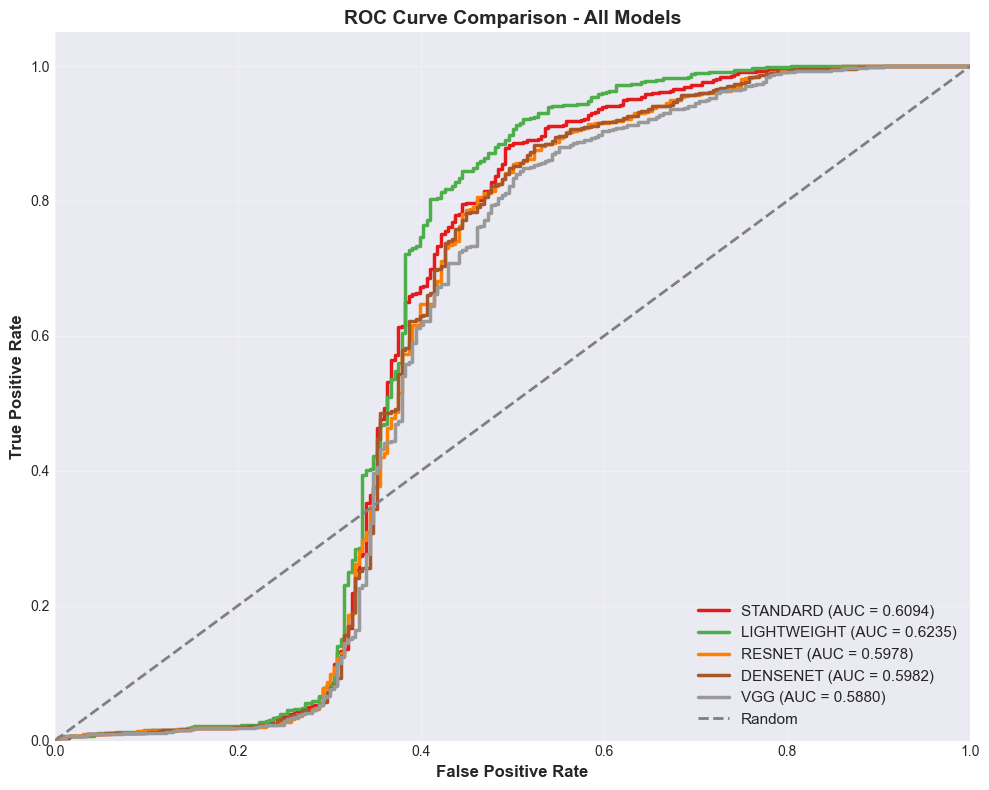

✓ Saved: 09_roc_comparison_all_models.png


In [24]:
# ==============================================================================
# 5. ALL MODELS ROC CURVE COMPARISON
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 8))

colors = plt.cm.Set1(np.linspace(0, 1, len(MODEL_TYPES)))

for idx, model_type in enumerate(MODEL_TYPES):
    mse_scores = all_mse_scores[model_type]
    fpr, tpr, _ = roc_curve(y_test_new, mse_scores)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=colors[idx], linewidth=2.5, 
            label=f'{model_type.upper()} (AUC = {roc_auc:.4f})')

ax.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random')
ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('ROC Curve Comparison - All Models', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.05])

plt.tight_layout()
plt.savefig(results_dir / '09_roc_comparison_all_models.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 09_roc_comparison_all_models.png")

In [25]:
# ==============================================================================
# 6. FINAL SUMMARY REPORT
# ==============================================================================
print("\n" + "="*80)
print("🧠 BRAIN TUMOR MRI ANOMALY DETECTION - FINAL REPORT")
print("="*80)

print(f"\n📊 BEST MODEL: {best_model_name.upper()}")
print(f"   Optimal Threshold: {best_threshold:.6f}")
print(f"   Method: Youden's J Statistic (maximize TPR - FPR)")

print(f"\n📈 PERFORMANCE METRICS:")
metrics = all_metrics[best_model_name]
print(f"   Accuracy:    {metrics['accuracy']*100:.2f}%")
print(f"   Precision:   {metrics['precision']*100:.2f}%")
print(f"   Recall:      {metrics['recall']*100:.2f}%  ← Tumor Detection Rate")
print(f"   F1-Score:    {metrics['f1']*100:.2f}%")
print(f"   Specificity: {metrics['specificity']*100:.2f}%  ← Normal Detection Rate")
print(f"   ROC-AUC:     {metrics['roc_auc']:.4f}")

print(f"\n📋 CONFUSION MATRIX BREAKDOWN:")
cm = confusion_matrix(y_test_new, best_pred)
tn, fp, fn, tp = cm.ravel()
print(f"   True Negatives (TN):  {tn:4d} - Normal correctly classified")
print(f"   False Positives (FP): {fp:4d} - Normal misclassified as Tumor")
print(f"   False Negatives (FN): {fn:4d} - Tumor missed (CRITICAL!)")
print(f"   True Positives (TP):  {tp:4d} - Tumor correctly detected")

print(f"\n🏥 CLINICAL INTERPRETATION:")
print(f"   • Out of {tp+fn} actual tumor cases, {tp} were detected ({metrics['recall']*100:.1f}% sensitivity)")
print(f"   • Out of {tn+fp} normal cases, {tn} were correctly identified ({metrics['specificity']*100:.1f}% specificity)")
if fn > 0:
    print(f"   ⚠️  WARNING: {fn} tumor cases were MISSED - critical for medical diagnosis!")
else:
    print(f"   ✓ EXCELLENT: No tumor cases were missed!")

print(f"\n📁 OUTPUT FILES GENERATED:")
for file in sorted(results_dir.glob('*.png')):
    print(f"   • {file.name}")
for file in sorted(results_dir.glob('*.csv')):
    print(f"   • {file.name}")
for file in sorted(results_dir.glob('*.json')):
    print(f"   • {file.name}")

print(f"\n" + "="*80)
print("✓ ANOMALY DETECTION PIPELINE COMPLETE!")
print("="*80)


🧠 BRAIN TUMOR MRI ANOMALY DETECTION - FINAL REPORT

📊 BEST MODEL: LIGHTWEIGHT
   Optimal Threshold: 0.002738
   Method: Youden's J Statistic (maximize TPR - FPR)

📈 PERFORMANCE METRICS:
   Accuracy:    78.08%
   Precision:   83.88%
   Recall:      87.19%  ← Tumor Detection Rate
   F1-Score:    85.50%
   Specificity: 51.95%  ← Normal Detection Rate
   ROC-AUC:     0.6235

📋 CONFUSION MATRIX BREAKDOWN:
   True Negatives (TN):   133 - Normal correctly classified
   False Positives (FP):  123 - Normal misclassified as Tumor
   False Negatives (FN):   94 - Tumor missed (CRITICAL!)
   True Positives (TP):   640 - Tumor correctly detected

🏥 CLINICAL INTERPRETATION:
   • Out of 734 actual tumor cases, 640 were detected (87.2% sensitivity)
   • Out of 256 normal cases, 133 were correctly identified (52.0% specificity)
   ⚠️  WARNING: 94 tumor cases were MISSED - critical for medical diagnosis!

📁 OUTPUT FILES GENERATED:
   • 00_class_balance_comparison.png
   • 01_eda_cleaned_data_distributio


🔥 GENERATING DETAILED HEATMAP / LOCALIZATION MAPS


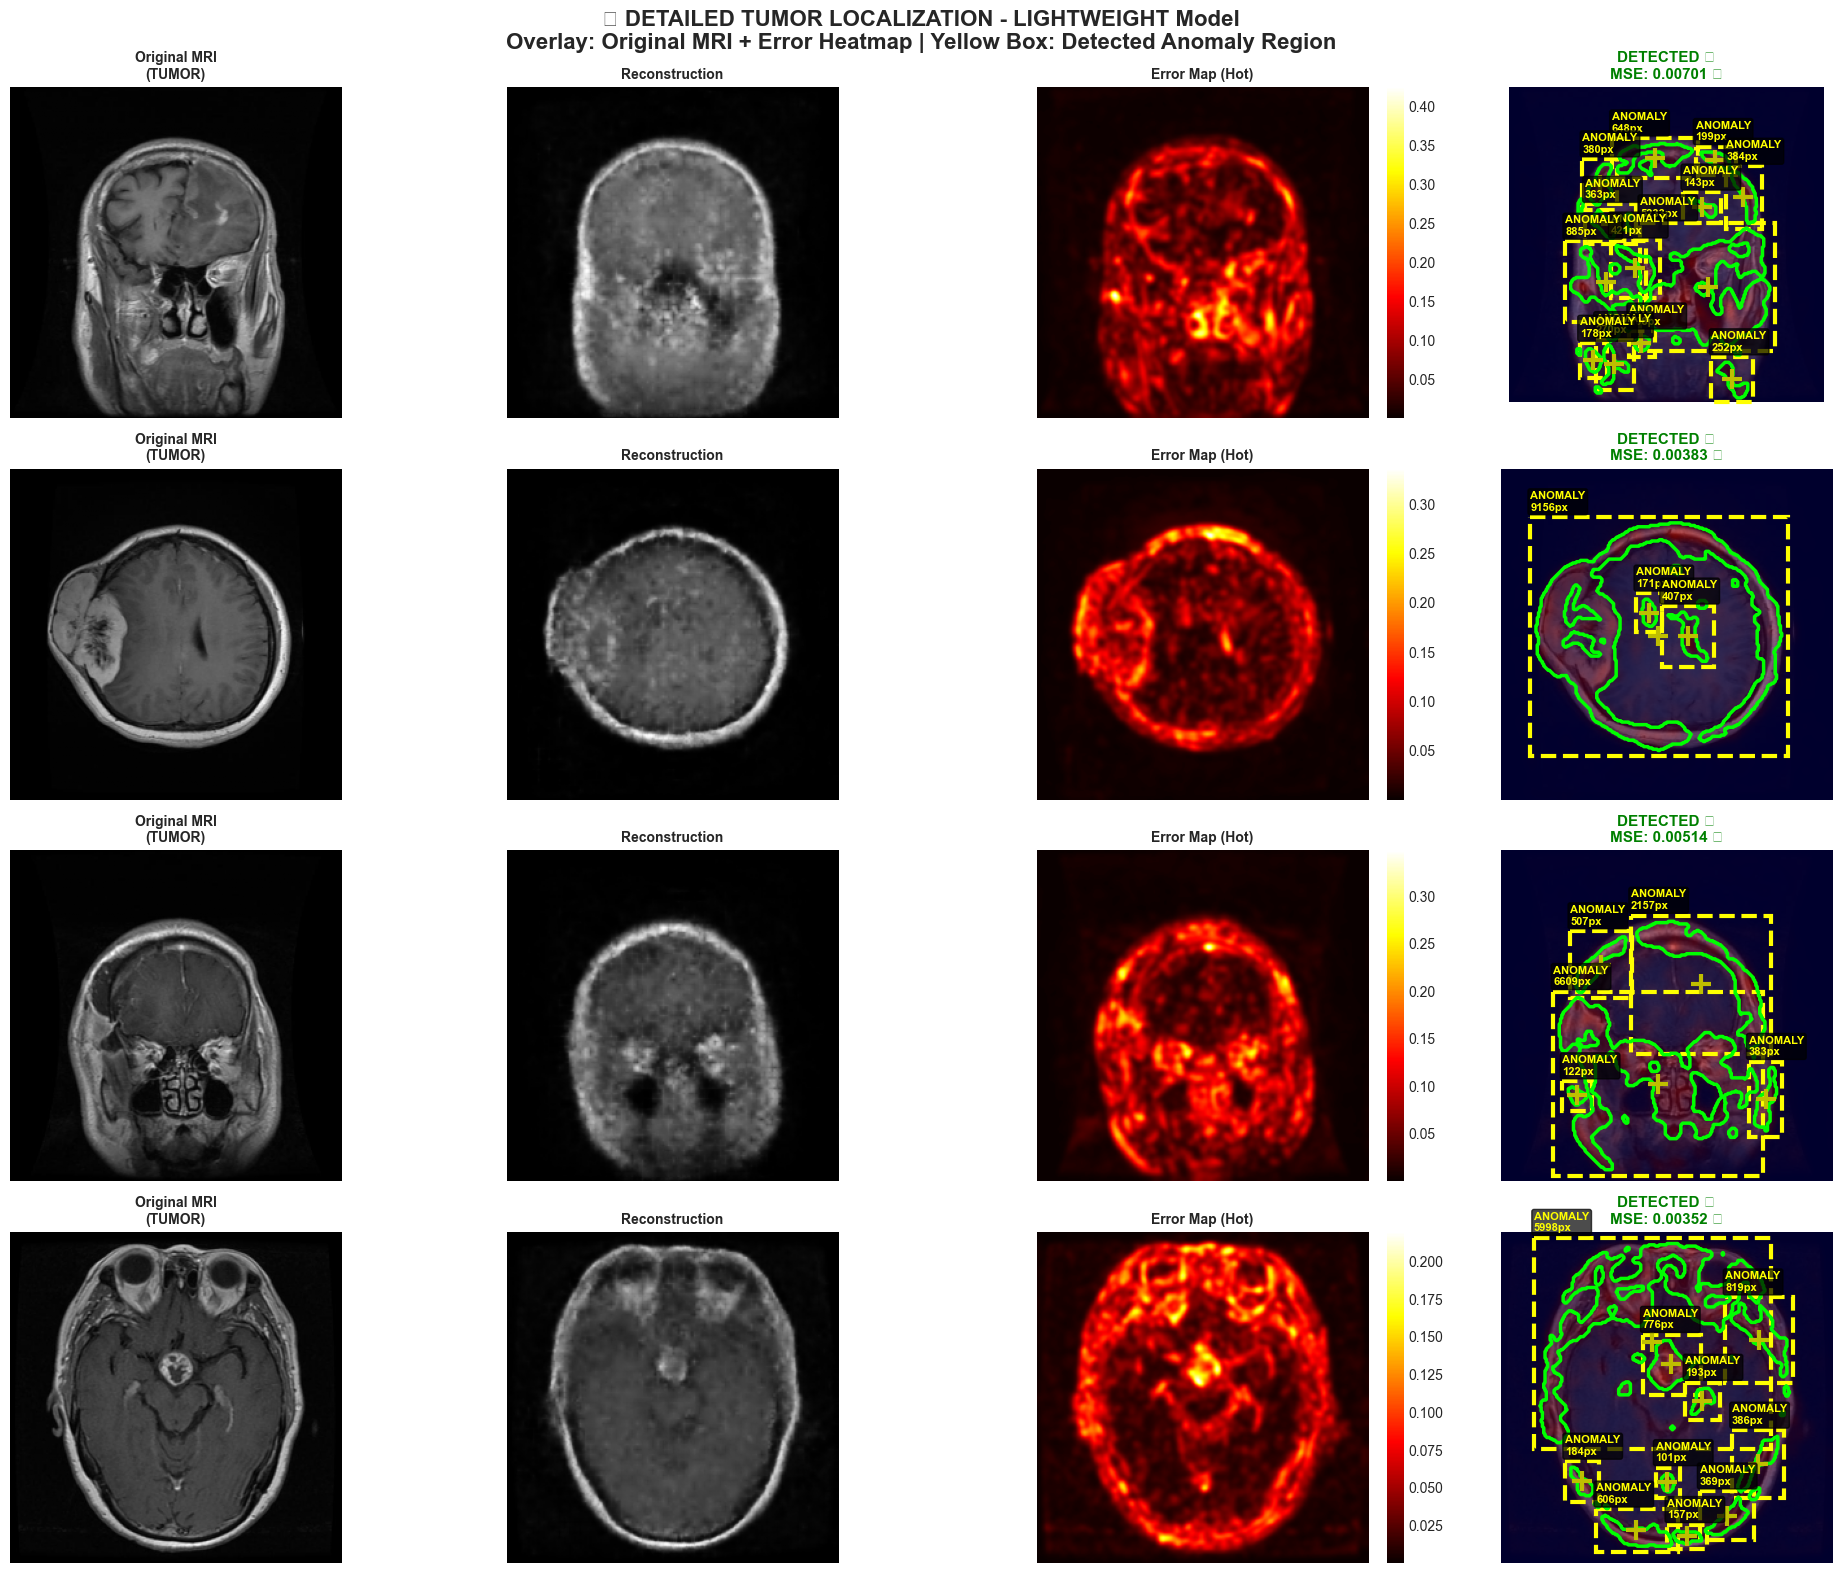

✓ Saved: 10a_detailed_tumor_heatmap.png


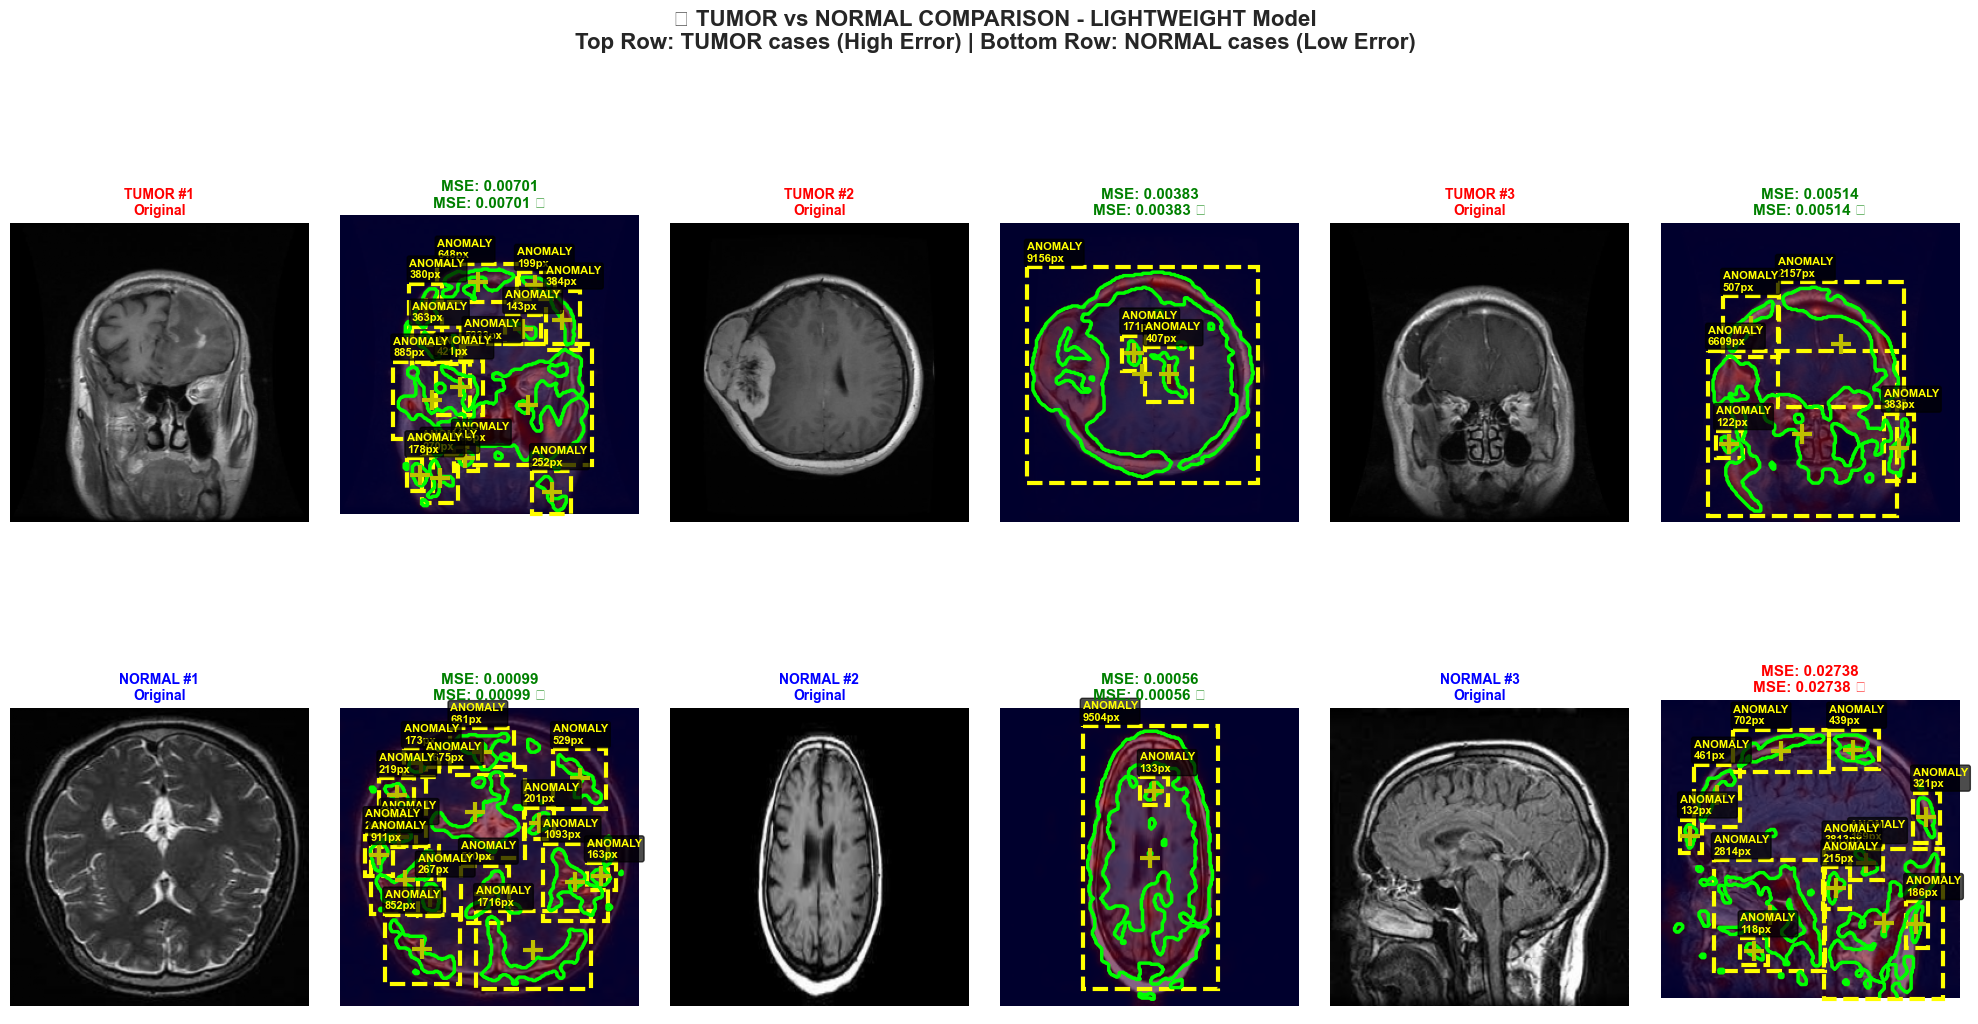

✓ Saved: 10b_tumor_vs_normal_heatmap.png


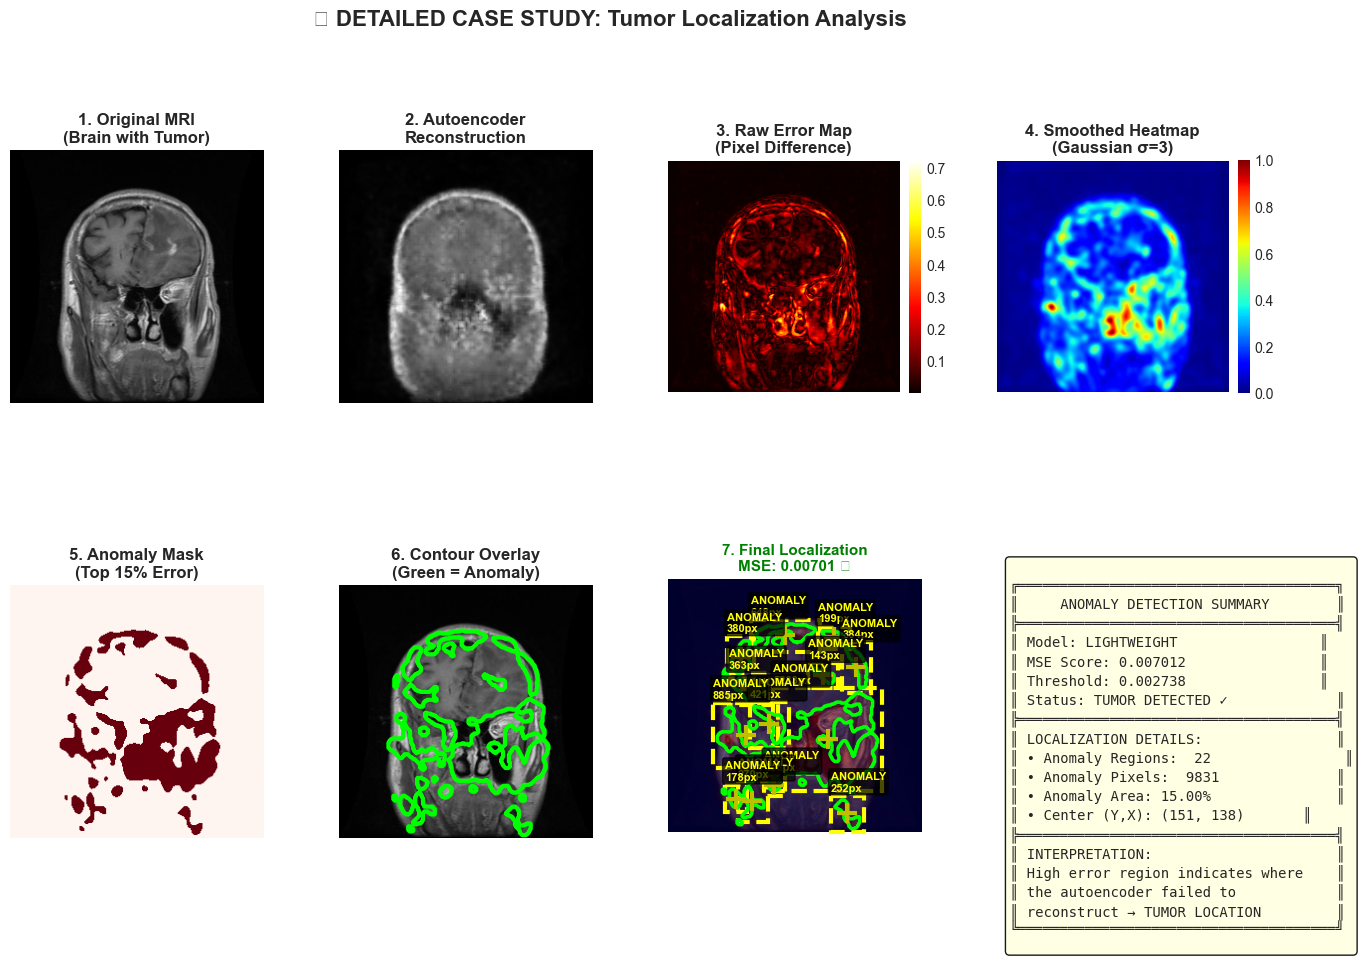

✓ Saved: 10c_case_study_detailed.png

📊 HEATMAP VISUALIZATION COMPLETE!

📁 Generated Files:
   • 10a_detailed_tumor_heatmap.png   - 4 tumor cases dengan full breakdown
   • 10b_tumor_vs_normal_heatmap.png  - Side-by-side comparison
   • 10c_case_study_detailed.png      - Single case dengan step-by-step analysis

🎨 HEATMAP LEGEND:
   🔴 RED/HOT areas    = High reconstruction error (ANOMALY/TUMOR)
   🔵 BLUE/COOL areas  = Low reconstruction error (NORMAL tissue)
   🟢 GREEN contour    = Boundary of detected anomaly region
   🟡 YELLOW box       = Bounding box around anomaly region
   ➕ Yellow cross     = Center of anomaly region


In [27]:
# ==============================================================================
# 7. HEATMAP / LOCALIZATION MAP - DETAILED VERSION
# ==============================================================================
from scipy import ndimage
from matplotlib.patches import Rectangle, Circle
import matplotlib.gridspec as gridspec

print("\n" + "="*80)
print("🔥 GENERATING DETAILED HEATMAP / LOCALIZATION MAPS")
print("="*80)

# Get reconstructions untuk heatmap
best_model.eval()
X_test_tensor_heatmap = torch.from_numpy(X_test_new).float().to(device)
with torch.no_grad():
    recon_heatmap = best_model(X_test_tensor_heatmap).cpu().numpy()

def create_detailed_heatmap(original, reconstruction, ax, title, mse_val, is_anomaly, pred_correct):
    """Create detailed heatmap with annotations and markers"""
    
    # Compute error map
    error_map = np.abs(original - reconstruction)
    
    # Gaussian smoothing untuk cleaner heatmap
    error_smooth = ndimage.gaussian_filter(error_map, sigma=3)
    
    # Normalize
    error_norm = (error_smooth - error_smooth.min()) / (error_smooth.max() - error_smooth.min() + 1e-8)
    
    # Create overlay: Original + Heatmap
    # Normalize original to 0-1
    orig_norm = (original - original.min()) / (original.max() - original.min() + 1e-8)
    
    # Create RGB version of original (grayscale to RGB)
    rgb_image = np.stack([orig_norm, orig_norm, orig_norm], axis=-1)
    
    # Create heatmap overlay (red channel for high error)
    heatmap_overlay = np.zeros_like(rgb_image)
    heatmap_overlay[:,:,0] = error_norm * 0.7  # Red channel
    heatmap_overlay[:,:,2] = (1 - error_norm) * 0.3  # Blue for low error
    
    # Blend original with heatmap
    alpha = 0.6
    blended = rgb_image * (1 - alpha) + heatmap_overlay * alpha
    blended = np.clip(blended, 0, 1)
    
    # Plot blended image
    ax.imshow(blended)
    
    # Find anomaly regions (top 15% error)
    threshold_high = np.percentile(error_norm, 85)
    anomaly_mask = error_norm > threshold_high
    
    # Add contours for anomaly regions
    if np.any(anomaly_mask):
        contours = ax.contour(anomaly_mask.astype(float), levels=[0.5], 
                             colors='lime', linewidths=2.5, linestyles='solid')
        
        # Find connected components and draw bounding boxes
        labeled_array, num_features = ndimage.label(anomaly_mask)
        
        for region_id in range(1, num_features + 1):
            region_mask = labeled_array == region_id
            region_size = np.sum(region_mask)
            
            # Only mark significant regions (>100 pixels)
            if region_size > 100:
                # Find bounding box
                rows = np.where(np.any(region_mask, axis=1))[0]
                cols = np.where(np.any(region_mask, axis=0))[0]
                
                if len(rows) > 0 and len(cols) > 0:
                    y_min, y_max = rows[0], rows[-1]
                    x_min, x_max = cols[0], cols[-1]
                    
                    # Add padding
                    padding = 5
                    y_min = max(0, y_min - padding)
                    y_max = min(error_norm.shape[0], y_max + padding)
                    x_min = max(0, x_min - padding)
                    x_max = min(error_norm.shape[1], x_max + padding)
                    
                    # Draw bounding box
                    rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                    linewidth=3, edgecolor='yellow', facecolor='none',
                                    linestyle='--')
                    ax.add_patch(rect)
                    
                    # Add center marker
                    center_y = (y_min + y_max) // 2
                    center_x = (x_min + x_max) // 2
                    ax.plot(center_x, center_y, 'y+', markersize=15, markeredgewidth=3)
                    
                    # Add label
                    ax.text(x_min, y_min - 5, f'ANOMALY\n{region_size}px', 
                           fontsize=8, color='yellow', fontweight='bold',
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.7))
    
    # Title with status
    status_color = 'green' if pred_correct else 'red'
    status_text = '✓' if pred_correct else '✗'
    
    ax.set_title(f'{title}\nMSE: {mse_val:.5f} {status_text}', 
                fontsize=11, fontweight='bold', color=status_color)
    ax.axis('off')
    
    return error_norm

# ==============================================================================
# FIGURE 1: DETAILED TUMOR HEATMAPS (True Positives)
# ==============================================================================
fig1 = plt.figure(figsize=(20, 16))
fig1.suptitle(f'🧠 DETAILED TUMOR LOCALIZATION - {best_model_name.upper()} Model\n' +
              'Overlay: Original MRI + Error Heatmap | Yellow Box: Detected Anomaly Region',
              fontsize=16, fontweight='bold', y=0.98)

# Get True Positive samples
tp_indices_detail = np.where((y_test_new == 1) & (best_pred == 1))[0][:4]

for i, idx in enumerate(tp_indices_detail):
    original = X_test_new[idx, 0]
    recon = recon_heatmap[idx, 0]
    mse_val = best_mse[idx]
    
    # Row for each sample: Original | Reconstruction | Error Map | Overlay Heatmap
    ax1 = fig1.add_subplot(4, 4, i*4 + 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original MRI\n(TUMOR)', fontsize=10, fontweight='bold')
    ax1.axis('off')
    
    ax2 = fig1.add_subplot(4, 4, i*4 + 2)
    ax2.imshow(recon, cmap='gray')
    ax2.set_title('Reconstruction', fontsize=10, fontweight='bold')
    ax2.axis('off')
    
    ax3 = fig1.add_subplot(4, 4, i*4 + 3)
    error = np.abs(original - recon)
    error_smooth = ndimage.gaussian_filter(error, sigma=2)
    im = ax3.imshow(error_smooth, cmap='hot')
    ax3.set_title('Error Map (Hot)', fontsize=10, fontweight='bold')
    ax3.axis('off')
    plt.colorbar(im, ax=ax3, fraction=0.046, pad=0.04)
    
    ax4 = fig1.add_subplot(4, 4, i*4 + 4)
    create_detailed_heatmap(original, recon, ax4, 'DETECTED ✓', mse_val, True, True)

plt.tight_layout()
plt.savefig(results_dir / '10a_detailed_tumor_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 10a_detailed_tumor_heatmap.png")

# ==============================================================================
# FIGURE 2: COMPARISON - TUMOR vs NORMAL
# ==============================================================================
fig2 = plt.figure(figsize=(20, 12))
fig2.suptitle(f'📊 TUMOR vs NORMAL COMPARISON - {best_model_name.upper()} Model\n' +
              'Top Row: TUMOR cases (High Error) | Bottom Row: NORMAL cases (Low Error)',
              fontsize=16, fontweight='bold', y=0.98)

# Tumor samples
tumor_sample_idx = np.where(y_test_new == 1)[0][:3]
# Normal samples  
normal_sample_idx = np.where(y_test_new == 0)[0][:3]

for col, idx in enumerate(tumor_sample_idx):
    original = X_test_new[idx, 0]
    recon = recon_heatmap[idx, 0]
    mse_val = best_mse[idx]
    pred_correct = best_pred[idx] == 1
    
    # Original
    ax1 = fig2.add_subplot(2, 6, col*2 + 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title(f'TUMOR #{col+1}\nOriginal', fontsize=10, fontweight='bold', color='red')
    ax1.axis('off')
    # Red border
    for spine in ax1.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(4)
        spine.set_visible(True)
    
    # Heatmap
    ax2 = fig2.add_subplot(2, 6, col*2 + 2)
    create_detailed_heatmap(original, recon, ax2, f'MSE: {mse_val:.5f}', mse_val, True, pred_correct)

for col, idx in enumerate(normal_sample_idx):
    original = X_test_new[idx, 0]
    recon = recon_heatmap[idx, 0]
    mse_val = best_mse[idx]
    pred_correct = best_pred[idx] == 0
    
    # Original
    ax1 = fig2.add_subplot(2, 6, col*2 + 7)
    ax1.imshow(original, cmap='gray')
    ax1.set_title(f'NORMAL #{col+1}\nOriginal', fontsize=10, fontweight='bold', color='blue')
    ax1.axis('off')
    # Blue border
    for spine in ax1.spines.values():
        spine.set_edgecolor('blue')
        spine.set_linewidth(4)
        spine.set_visible(True)
    
    # Heatmap
    ax2 = fig2.add_subplot(2, 6, col*2 + 8)
    create_detailed_heatmap(original, recon, ax2, f'MSE: {mse_val:.5f}', mse_val, False, pred_correct)

plt.tight_layout()
plt.savefig(results_dir / '10b_tumor_vs_normal_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 10b_tumor_vs_normal_heatmap.png")

# ==============================================================================
# FIGURE 3: SINGLE DETAILED CASE STUDY
# ==============================================================================
fig3 = plt.figure(figsize=(16, 10))
fig3.suptitle('🔬 DETAILED CASE STUDY: Tumor Localization Analysis', 
              fontsize=16, fontweight='bold', y=0.98)

# Pick best detected tumor case (highest MSE among TP)
tp_mse_values = best_mse[tp_indices_detail]
best_tp_local_idx = np.argmax(tp_mse_values)
best_tp_idx = tp_indices_detail[best_tp_local_idx]

original = X_test_new[best_tp_idx, 0]
recon = recon_heatmap[best_tp_idx, 0]
mse_val = best_mse[best_tp_idx]

# Create detailed visualizations
gs = fig3.add_gridspec(2, 4, hspace=0.3, wspace=0.3)

# 1. Original MRI
ax1 = fig3.add_subplot(gs[0, 0])
ax1.imshow(original, cmap='gray')
ax1.set_title('1. Original MRI\n(Brain with Tumor)', fontsize=12, fontweight='bold')
ax1.axis('off')

# 2. Reconstruction
ax2 = fig3.add_subplot(gs[0, 1])
ax2.imshow(recon, cmap='gray')
ax2.set_title('2. Autoencoder\nReconstruction', fontsize=12, fontweight='bold')
ax2.axis('off')

# 3. Raw Error Map
ax3 = fig3.add_subplot(gs[0, 2])
error_raw = np.abs(original - recon)
im3 = ax3.imshow(error_raw, cmap='hot')
ax3.set_title('3. Raw Error Map\n(Pixel Difference)', fontsize=12, fontweight='bold')
ax3.axis('off')
plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

# 4. Smoothed Error Map
ax4 = fig3.add_subplot(gs[0, 3])
error_smooth = ndimage.gaussian_filter(error_raw, sigma=3)
error_norm = (error_smooth - error_smooth.min()) / (error_smooth.max() - error_smooth.min() + 1e-8)
im4 = ax4.imshow(error_norm, cmap='jet')
ax4.set_title('4. Smoothed Heatmap\n(Gaussian σ=3)', fontsize=12, fontweight='bold')
ax4.axis('off')
plt.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)

# 5. Thresholded Anomaly Mask
ax5 = fig3.add_subplot(gs[1, 0])
threshold_85 = np.percentile(error_norm, 85)
anomaly_mask = (error_norm > threshold_85).astype(float)
ax5.imshow(anomaly_mask, cmap='Reds')
ax5.set_title(f'5. Anomaly Mask\n(Top 15% Error)', fontsize=12, fontweight='bold')
ax5.axis('off')

# 6. Contour on Original
ax6 = fig3.add_subplot(gs[1, 1])
ax6.imshow(original, cmap='gray')
ax6.contour(anomaly_mask, levels=[0.5], colors='lime', linewidths=3)
ax6.set_title('6. Contour Overlay\n(Green = Anomaly)', fontsize=12, fontweight='bold')
ax6.axis('off')

# 7. Final Overlay with Bounding Box
ax7 = fig3.add_subplot(gs[1, 2])
create_detailed_heatmap(original, recon, ax7, '7. Final Localization', mse_val, True, True)

# 8. Summary Stats
ax8 = fig3.add_subplot(gs[1, 3])
ax8.axis('off')

# Calculate stats
labeled_array, num_regions = ndimage.label(anomaly_mask)
total_anomaly_pixels = np.sum(anomaly_mask)
anomaly_percentage = (total_anomaly_pixels / anomaly_mask.size) * 100

# Find center of mass of anomaly
if np.any(anomaly_mask):
    center_of_mass = ndimage.center_of_mass(anomaly_mask)
else:
    center_of_mass = (0, 0)

summary_text = f"""
╔══════════════════════════════════════╗
║     ANOMALY DETECTION SUMMARY        ║
╠══════════════════════════════════════╣
║ Model: {best_model_name.upper():26s}  ║
║ MSE Score: {mse_val:.6f}                ║
║ Threshold: {best_threshold:.6f}                ║
║ Status: TUMOR DETECTED ✓             ║
╠══════════════════════════════════════╣
║ LOCALIZATION DETAILS:                ║
║ • Anomaly Regions: {num_regions:3d}                ║
║ • Anomaly Pixels: {total_anomaly_pixels:5.0f}              ║
║ • Anomaly Area: {anomaly_percentage:5.2f}%               ║
║ • Center (Y,X): ({center_of_mass[0]:3.0f}, {center_of_mass[1]:3.0f})       ║
╠══════════════════════════════════════╣
║ INTERPRETATION:                      ║
║ High error region indicates where    ║
║ the autoencoder failed to            ║
║ reconstruct → TUMOR LOCATION         ║
╚══════════════════════════════════════╝
"""
ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.savefig(results_dir / '10c_case_study_detailed.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: 10c_case_study_detailed.png")

# ==============================================================================
# SUMMARY
# ==============================================================================
print(f"\n" + "="*80)
print("📊 HEATMAP VISUALIZATION COMPLETE!")
print("="*80)
print(f"\n📁 Generated Files:")
print(f"   • 10a_detailed_tumor_heatmap.png   - 4 tumor cases dengan full breakdown")
print(f"   • 10b_tumor_vs_normal_heatmap.png  - Side-by-side comparison")
print(f"   • 10c_case_study_detailed.png      - Single case dengan step-by-step analysis")

print(f"\n🎨 HEATMAP LEGEND:")
print(f"   🔴 RED/HOT areas    = High reconstruction error (ANOMALY/TUMOR)")
print(f"   🔵 BLUE/COOL areas  = Low reconstruction error (NORMAL tissue)")
print(f"   🟢 GREEN contour    = Boundary of detected anomaly region")
print(f"   🟡 YELLOW box       = Bounding box around anomaly region")
print(f"   ➕ Yellow cross     = Center of anomaly region")